# Humidex is an index that is calculated, based on air temperature and humidity, devised by the Canadian meteorologists, to describe the experiences of an average person during hot.

Its formula is given by:

$H = T + (0.5555*(e-10)) $, where $T$ is the temperature in Celsius and $e$ is the vapor pressure in millibars (mb).

$e$ cand be defined as:

$e = 6.11*e^{5417.7530*({1 \over 273.16} - {1 \over dewpoint})}$

In [4]:
# Function to get e and H given T in celsius and dewpoint also in celsius

def get_e(td):
    e = 6.11*np.exp(5417.7530*((1/273.16) - 1/td))
    return e

def get_humidex(T,td):
    H = T + (0.5555*(get_e(td) - 10))
    return H

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('default')

In [3]:
data = pd.read_csv("DATA111_HW.csv")

# 1 - By the simplified equation

reference: https://journals.ametsoc.org/doi/pdf/10.1175/BAMS-86-2-225

By this article the Dew point is calculated, with 0.1º precision by HR > 50%, by

$ T_{dew} = T_{air}  - {100 - HR \over 5}$, where HR is the relative humidity and $T_{air}$ is the air temperature in degree Celsius

In [25]:
# getting Tdew for max,mean and min temperatures all of them with the relative humidty of the day
def get_td(t,hr):
    td = t - (100-hr)/5
    return td

temp_vars = ['MIN_N_AIRTMP_MED10','MEAN_N_AIRTMP_MED10','MAX_N_AIRTMP_MED10']

data['td_min'] = get_td(data[temp_vars[0]],data['MEAN_N_AIRMTR_PCT10'])
data['td_max'] = get_td(data[temp_vars[2]],data['MEAN_N_AIRMTR_PCT10'])
data['td_mean'] = get_td(data[temp_vars[1]],data['MEAN_N_AIRMTR_PCT10'])

In [26]:
# Getting humidex

data['h_min'] = get_humidex(data[temp_vars[0]],data['td_min'])
data['h_max'] = get_humidex(data[temp_vars[2]],data['td_max'])
data['h_mean'] = get_humidex(data[temp_vars[1]],data['td_mean'])

c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


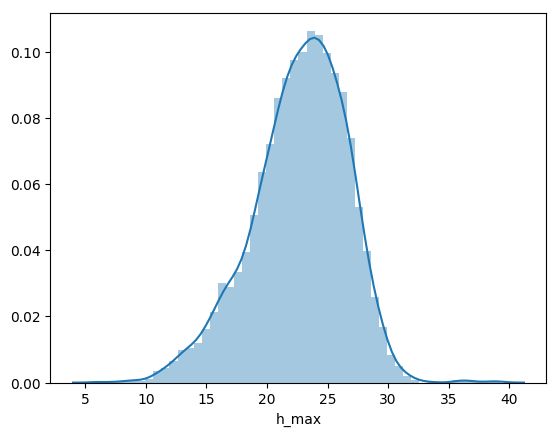

In [31]:
sns.distplot(data['h_max'])

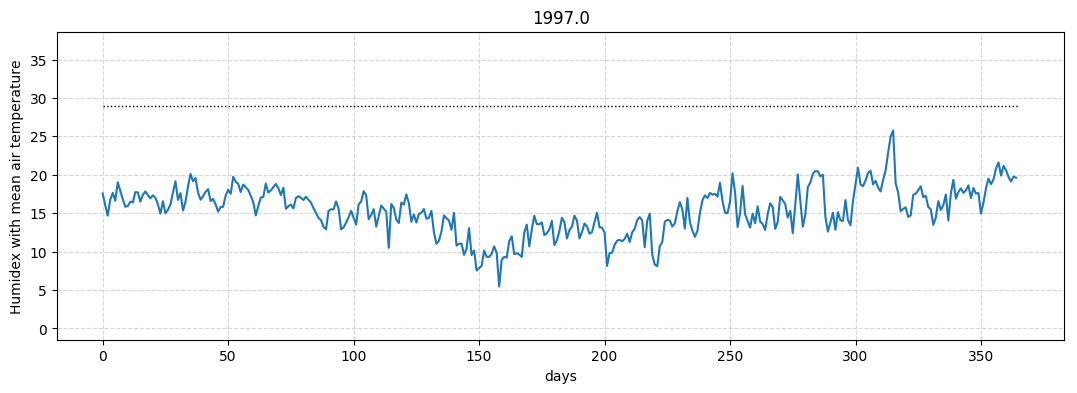

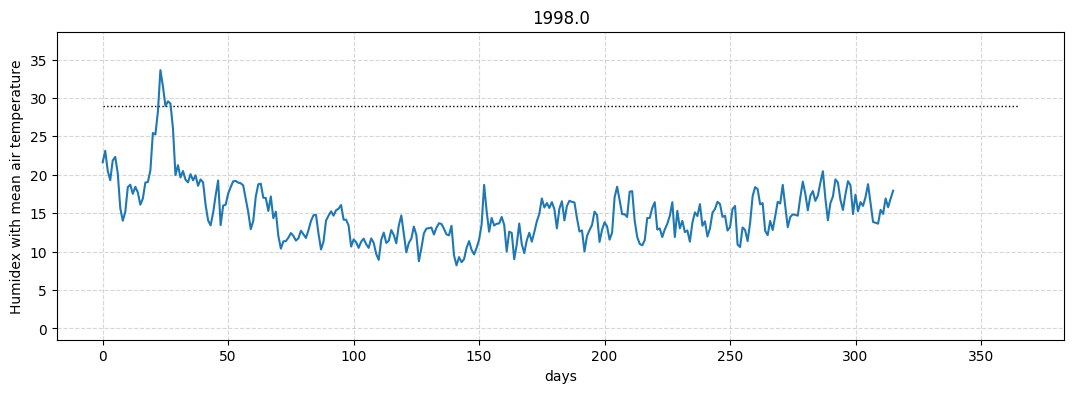

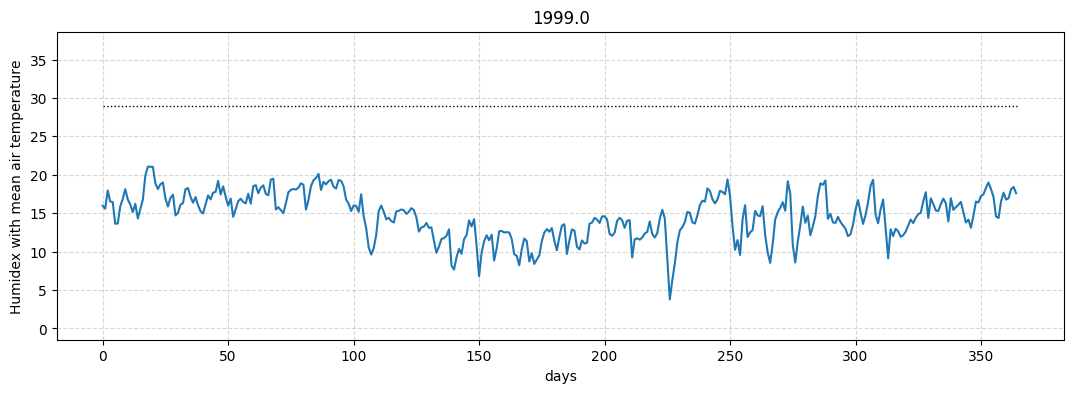

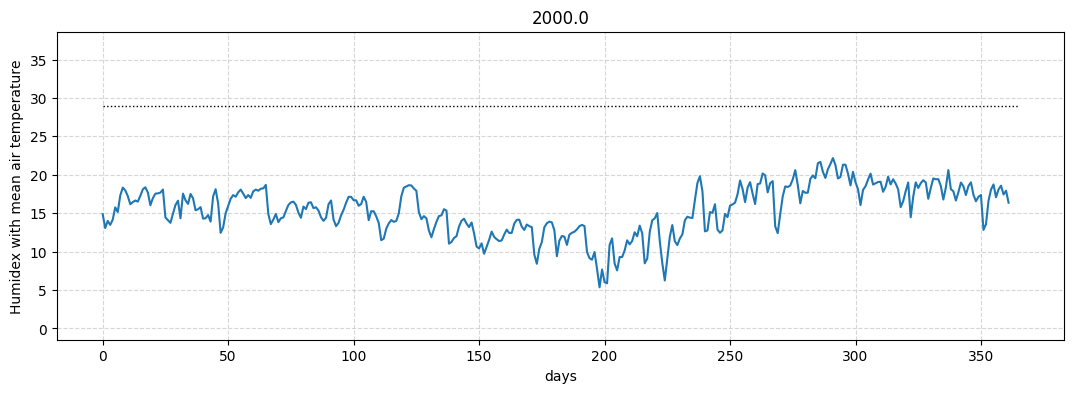

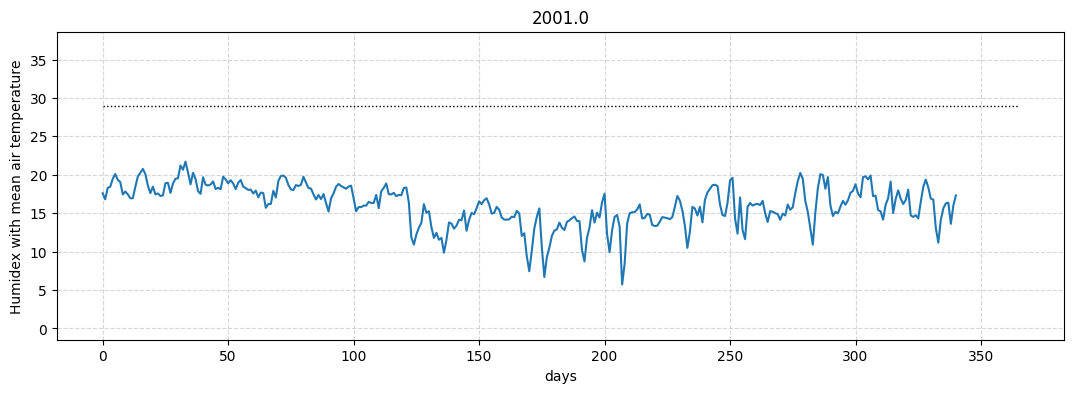

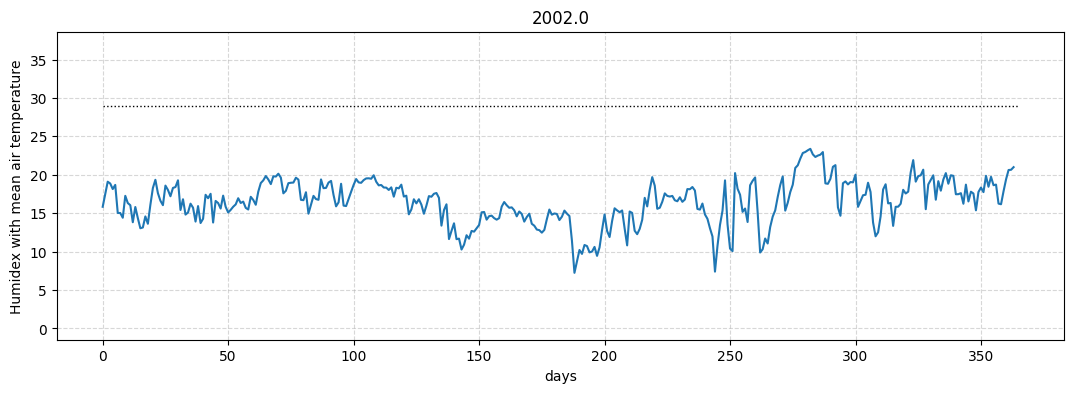

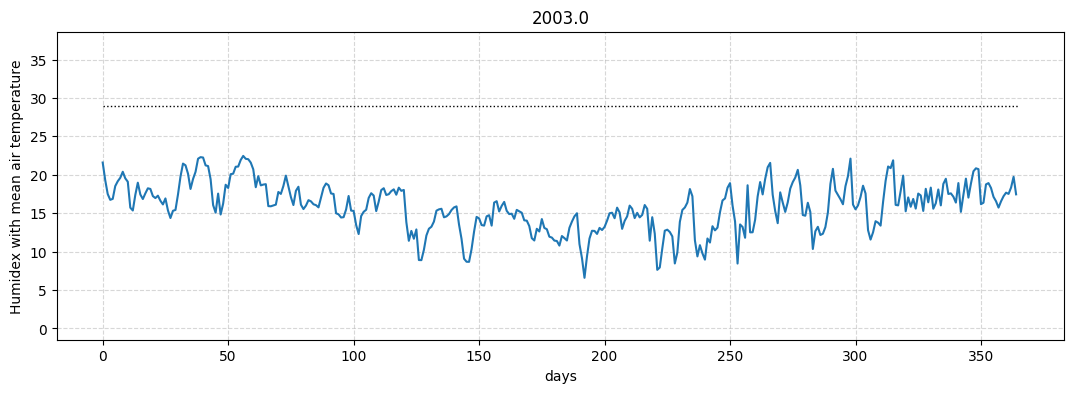

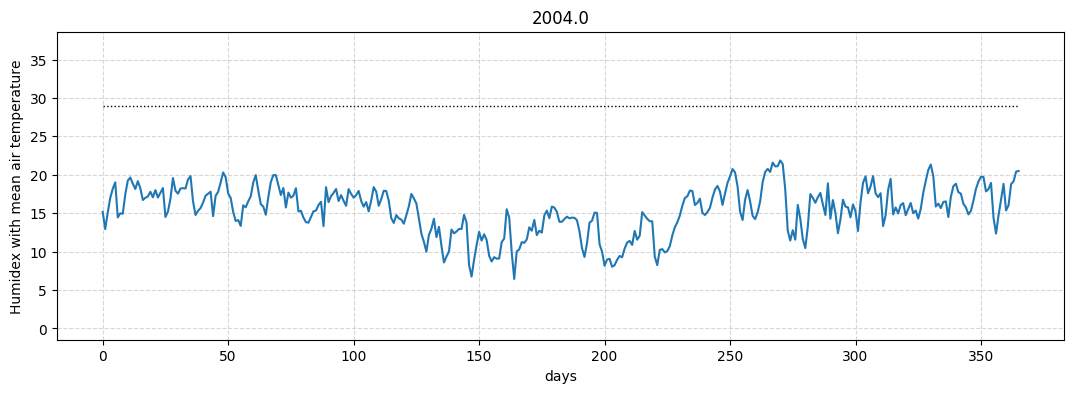

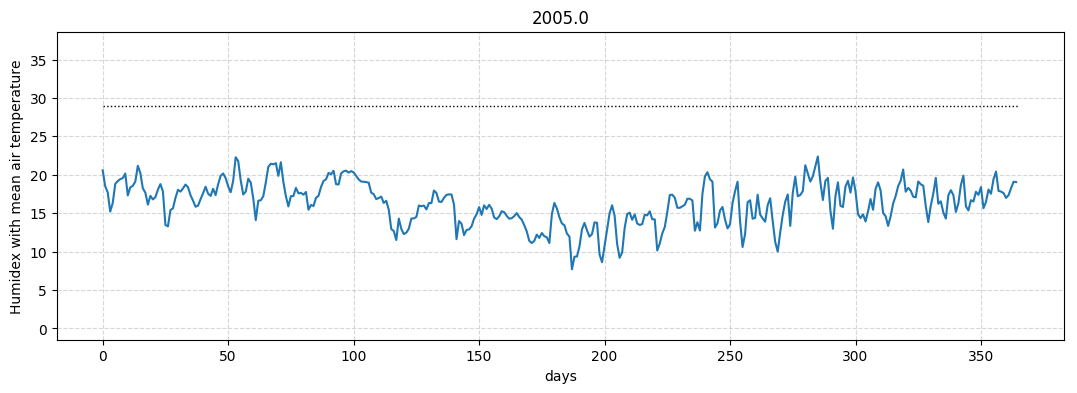

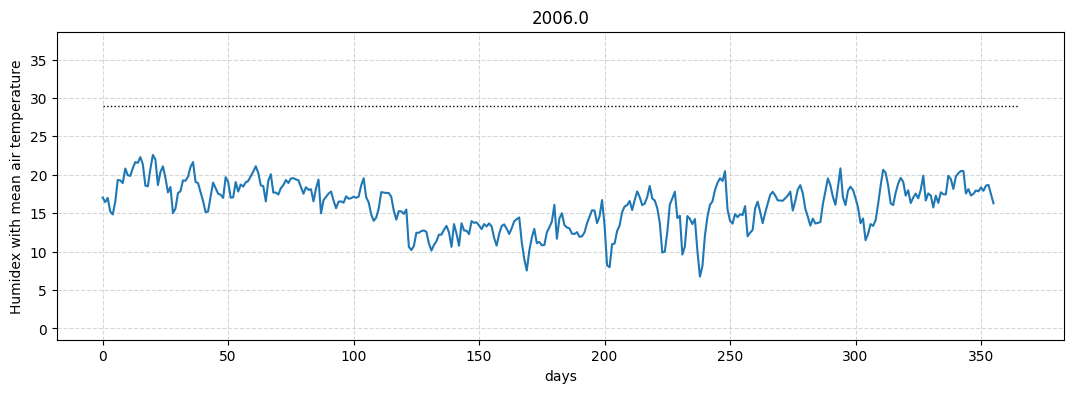

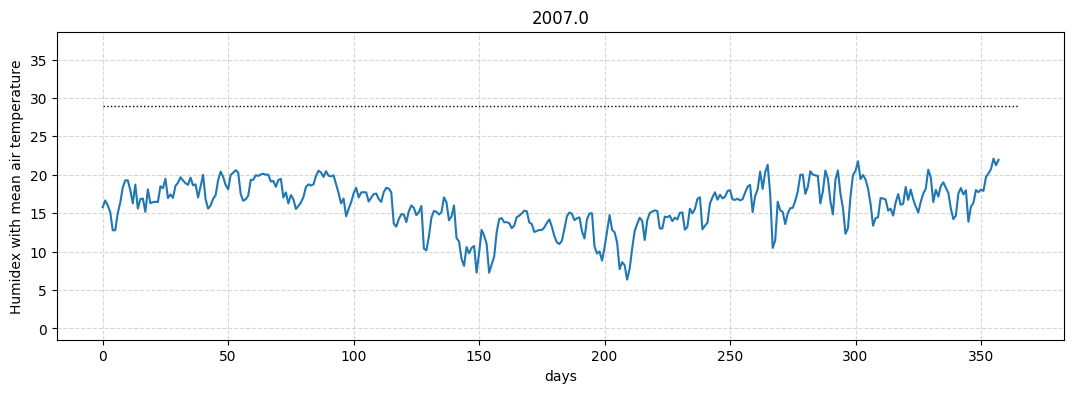

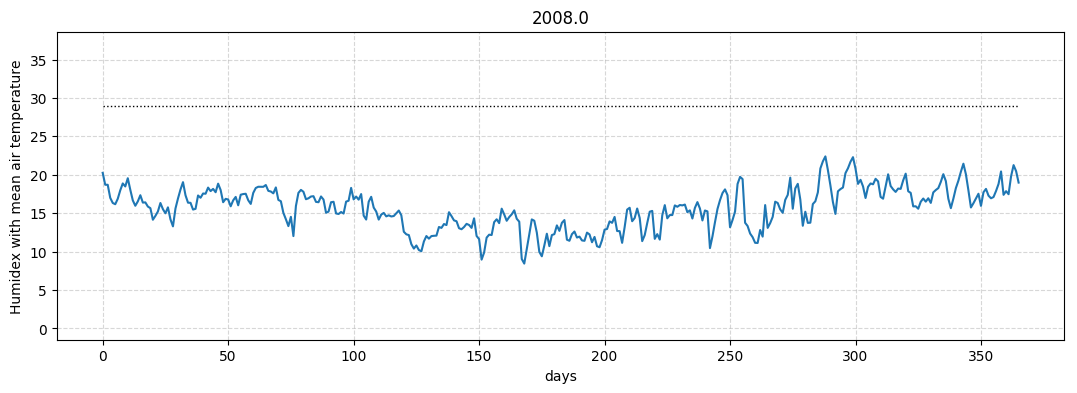

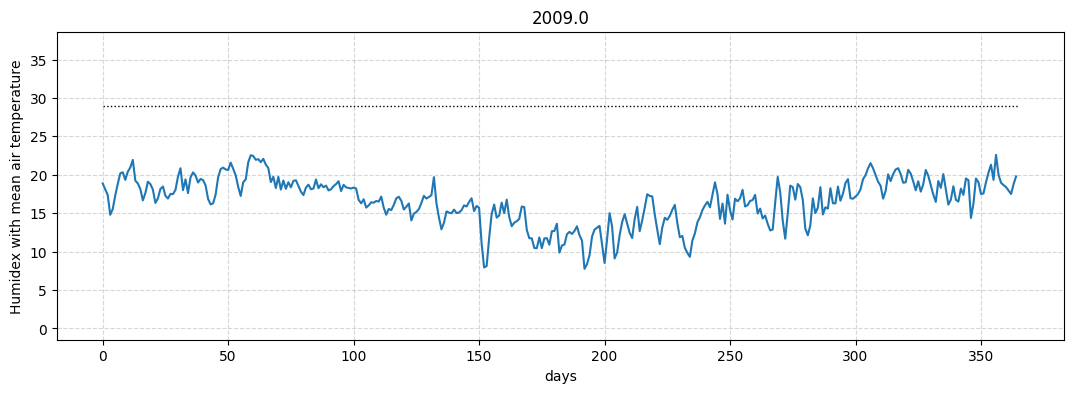

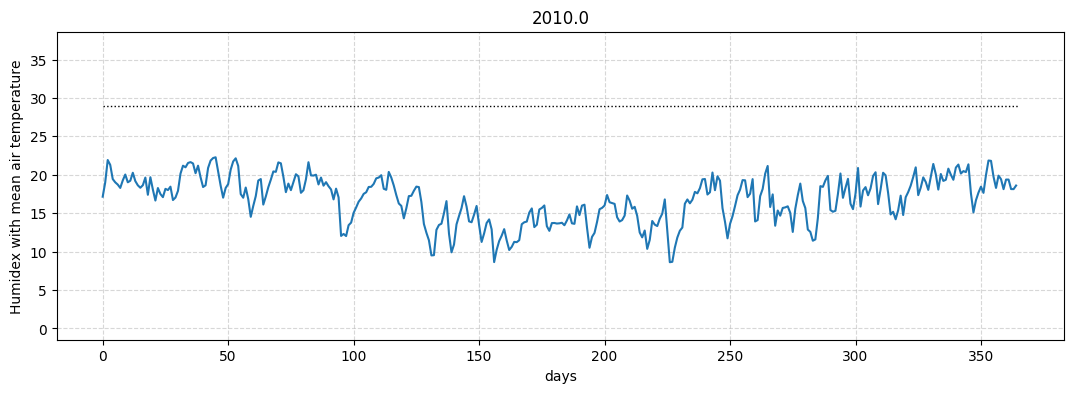

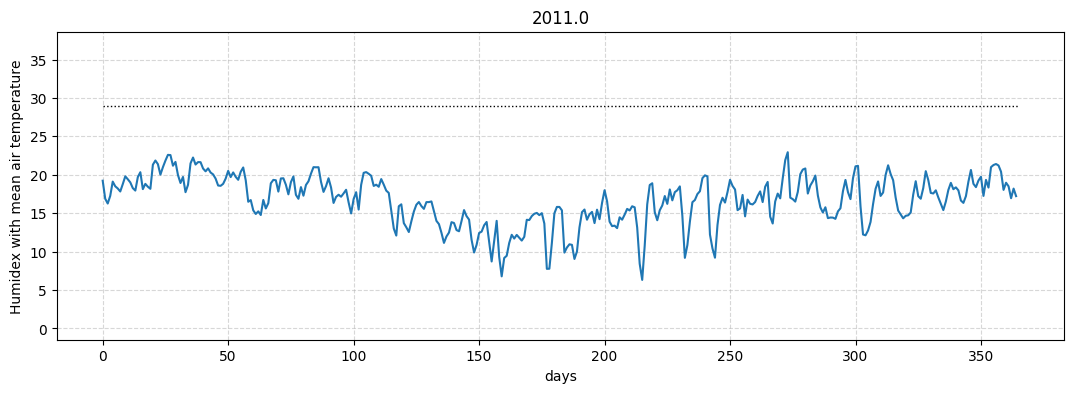

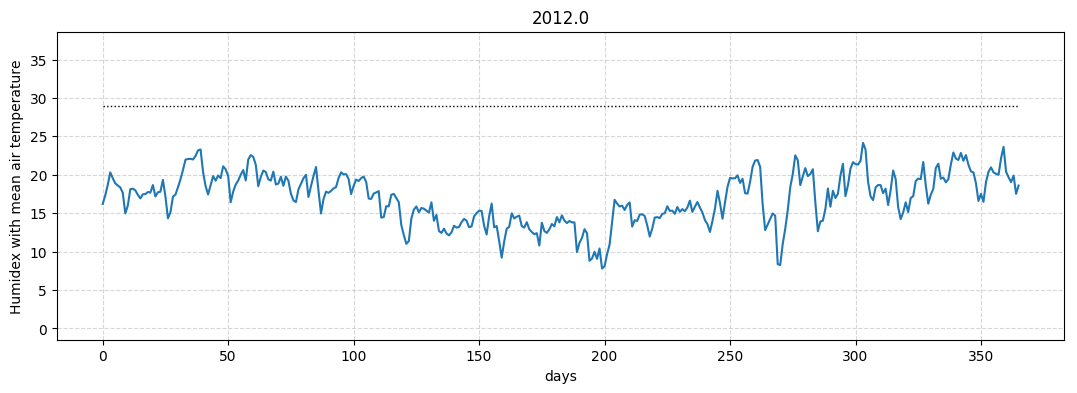

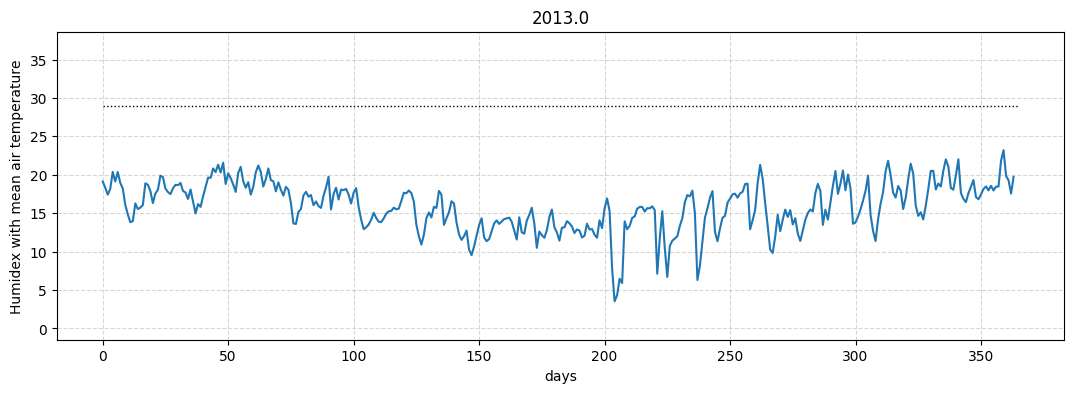

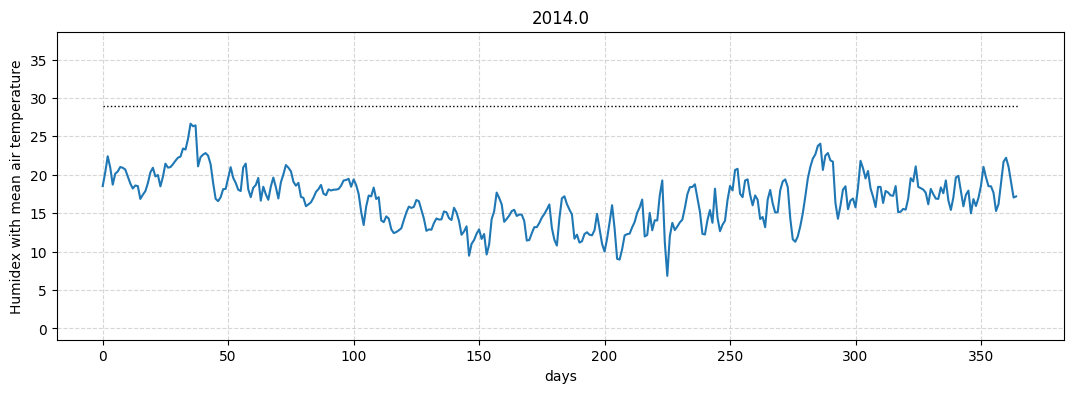

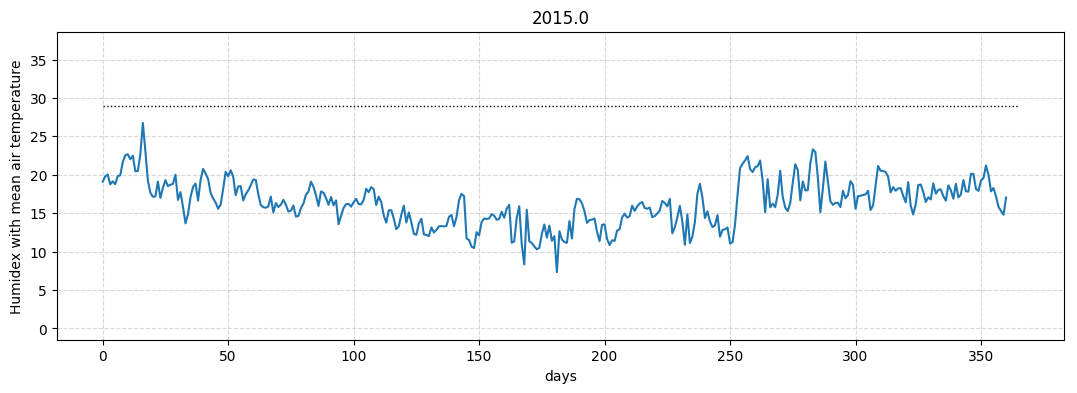

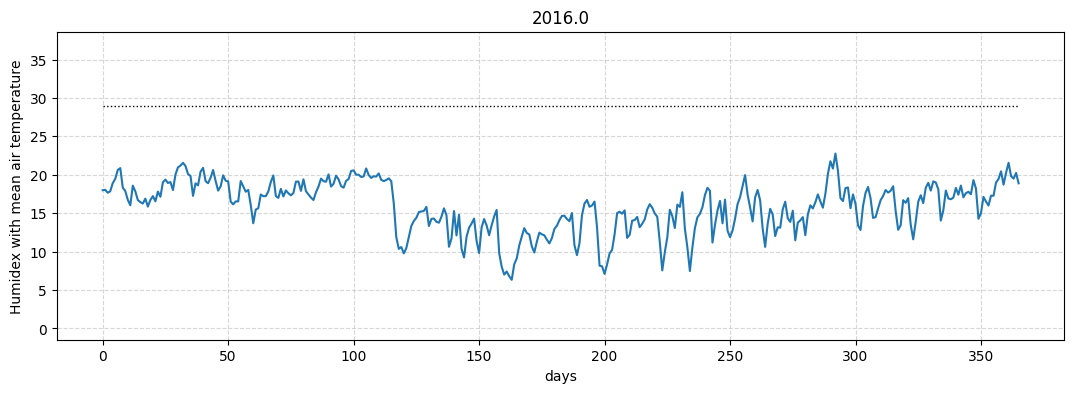

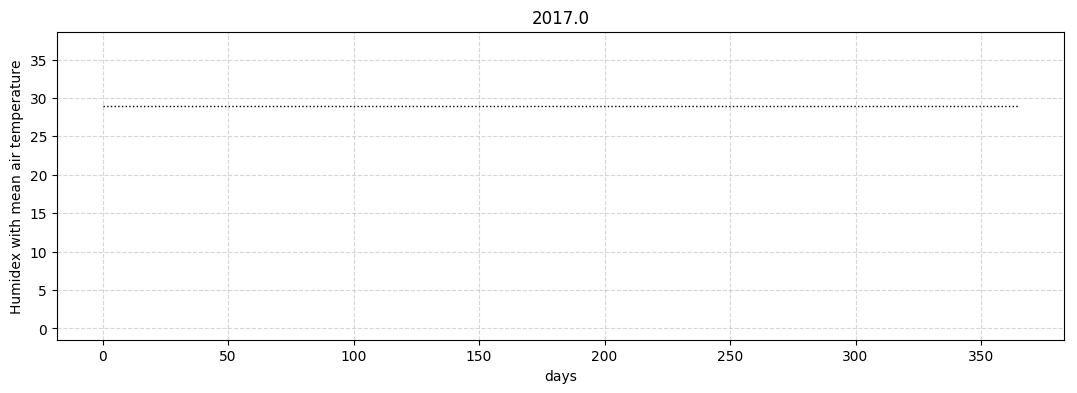

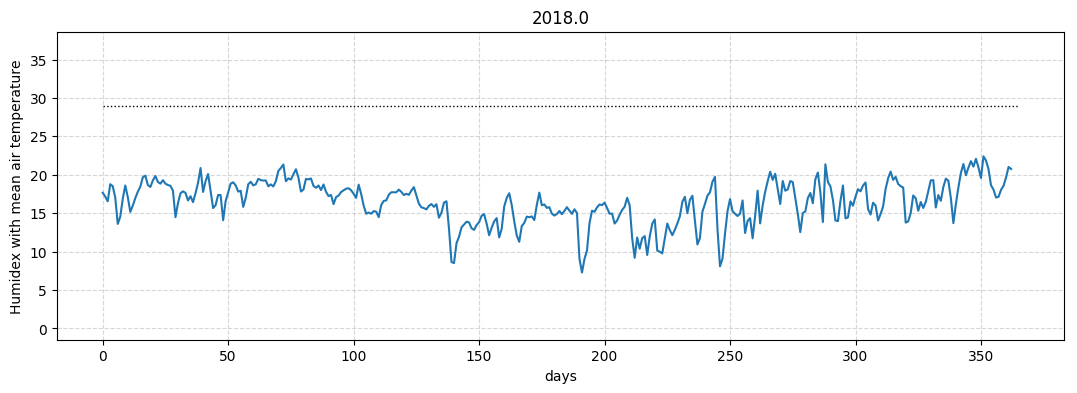

In [36]:
var1 = 'h_mean'

min_y_value = data[var1].min() - 5
max_y_value = data[var1].max() + 5


for i in data['YEAR'].unique():
    data_2plot = data[(data['YEAR'] == i)]

    plt.figure(figsize=(13,4))
    plt.title(str(i))    
    plt.plot(np.arange(data_2plot.shape[0]),data_2plot[var1])
    
    plt.hlines(y=29,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    plt.hlines(y=39,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    plt.hlines(y=45,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    plt.hlines(y=54,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    
    plt.xlabel('days')
    plt.ylabel('Humidex with mean air temperature')
    plt.grid(True, linestyle='--', alpha = 0.5)
#     plt.xlim(min_x_value, max_x_value)
    plt.ylim(min_y_value, max_y_value)
    plt.show()

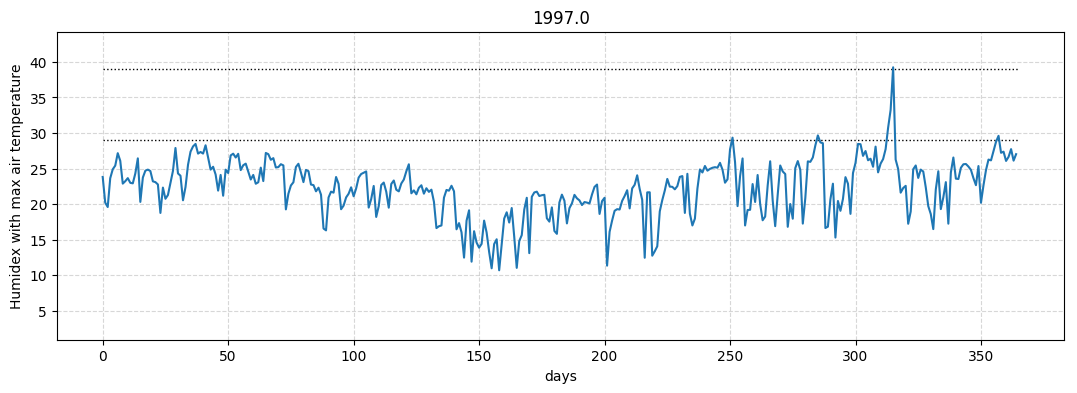

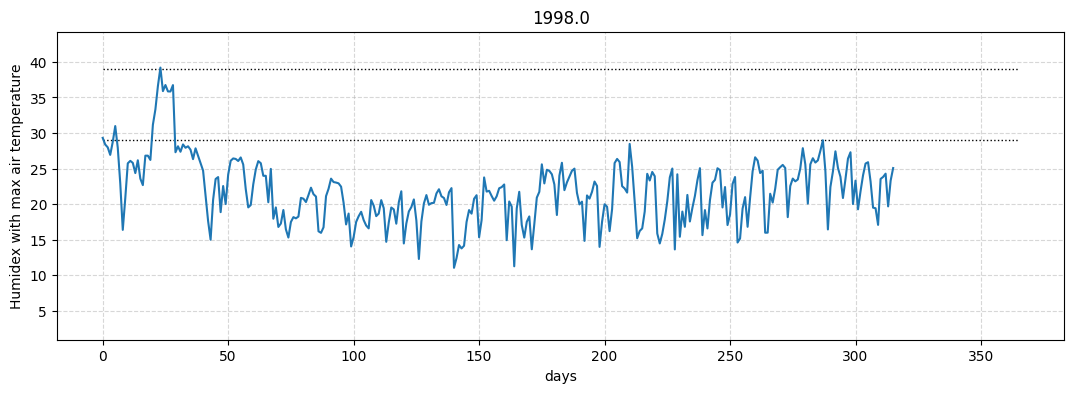

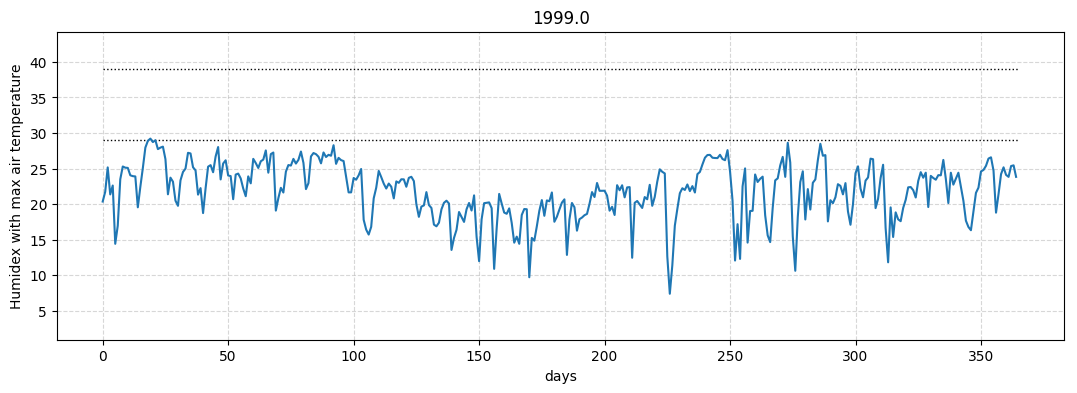

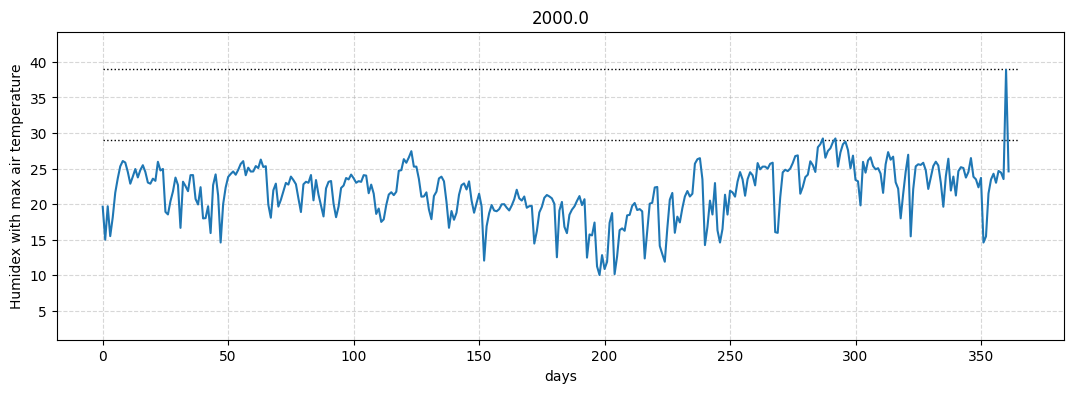

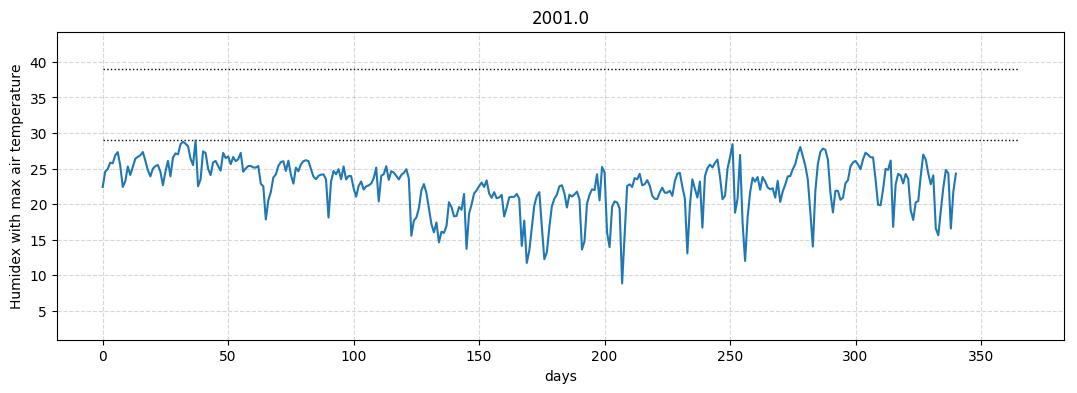

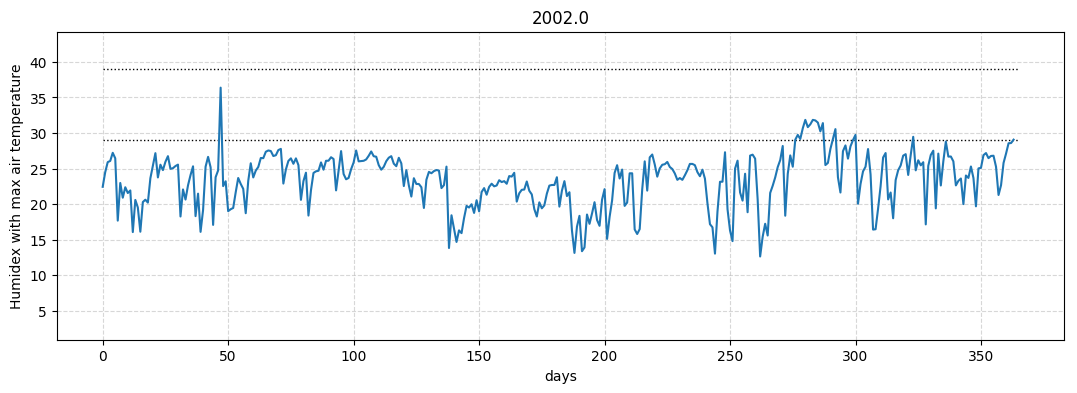

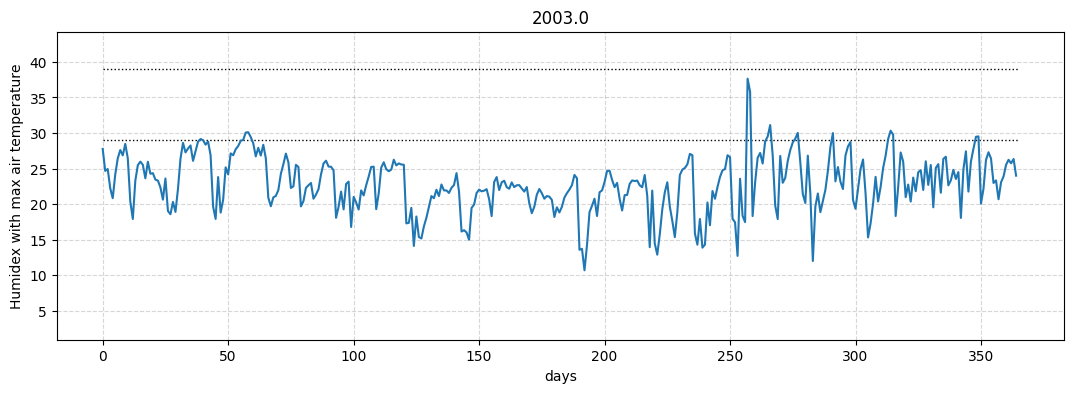

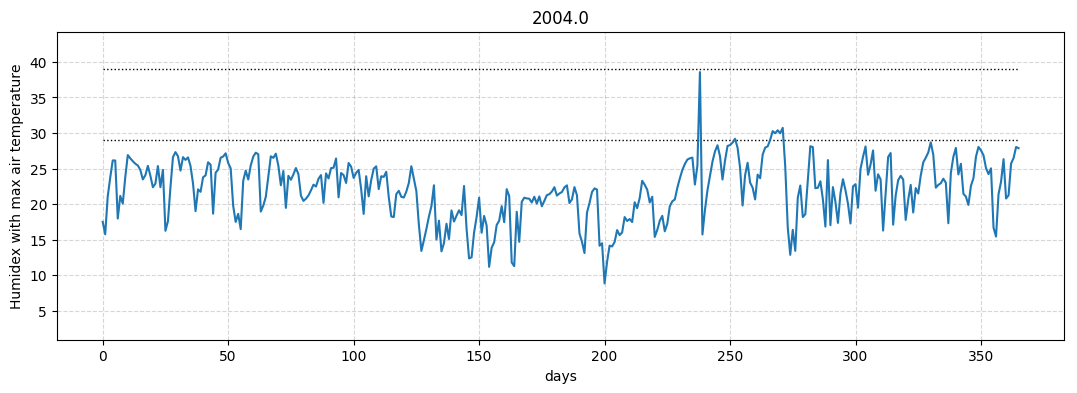

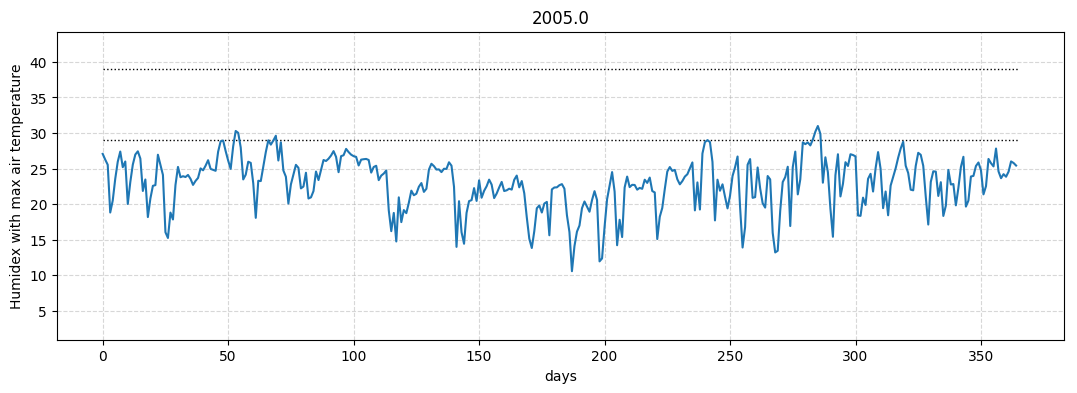

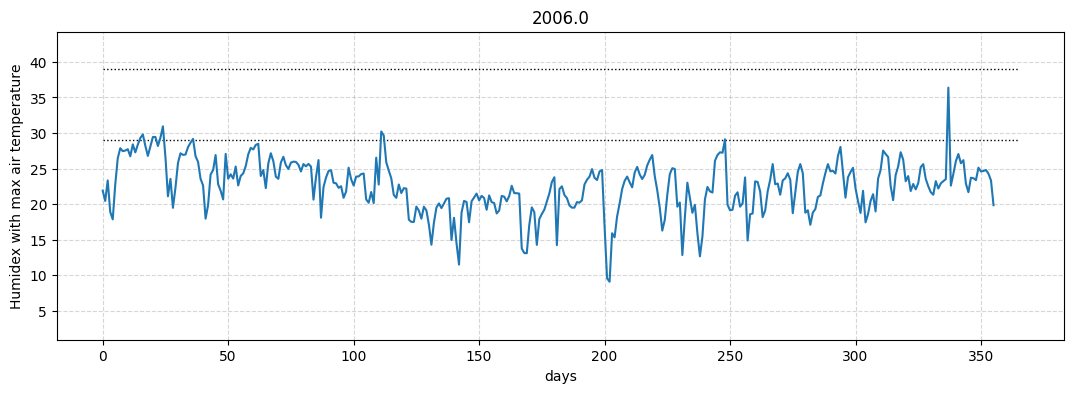

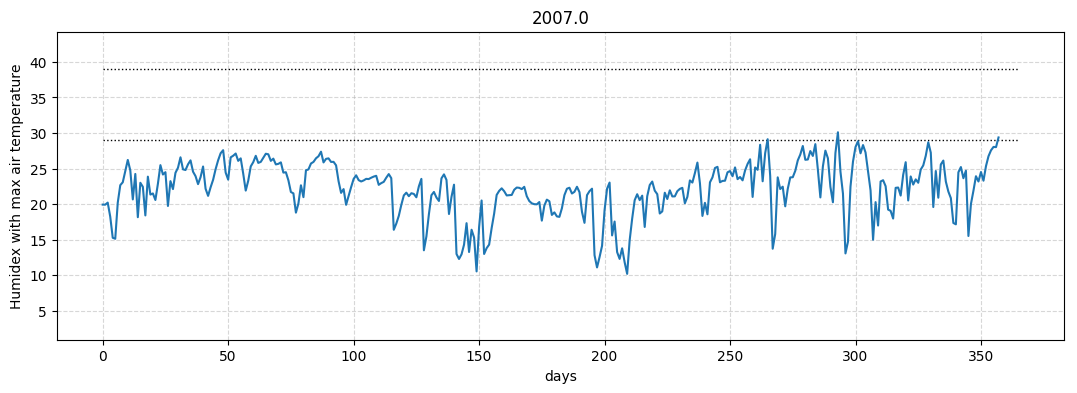

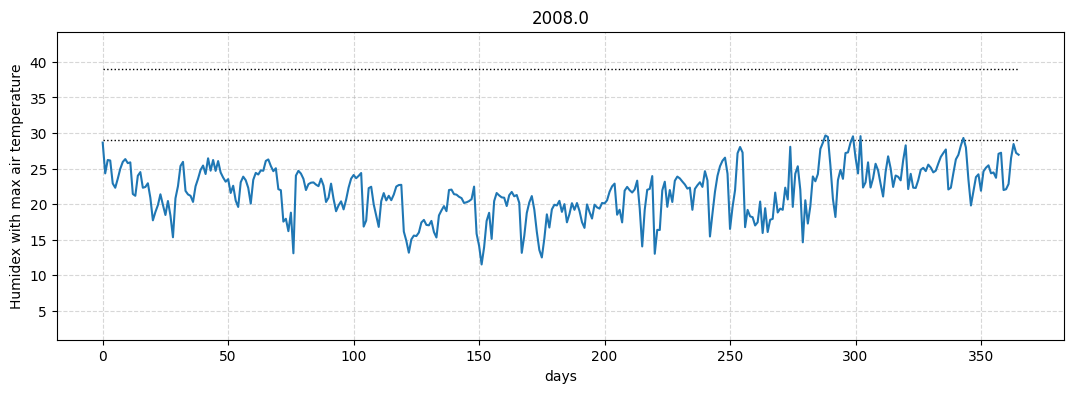

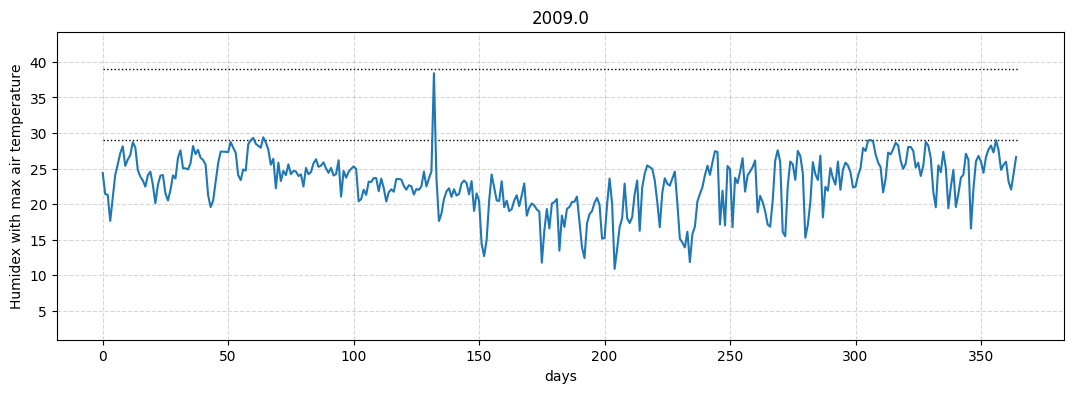

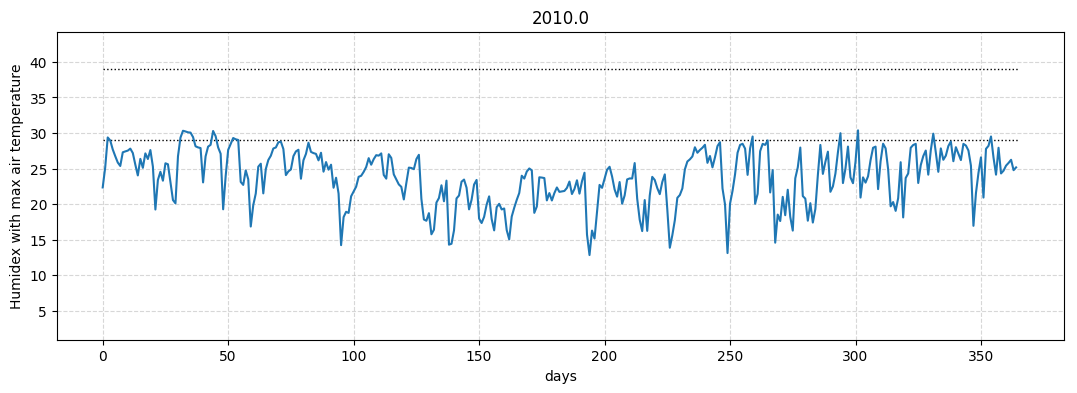

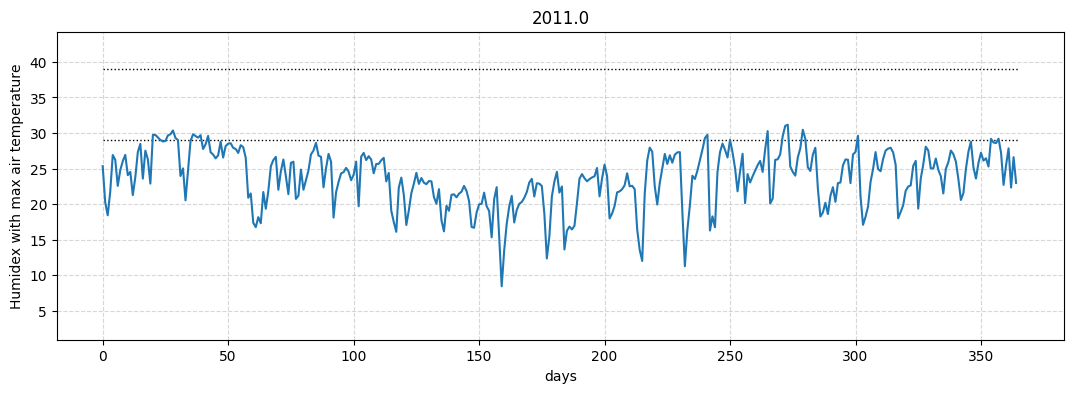

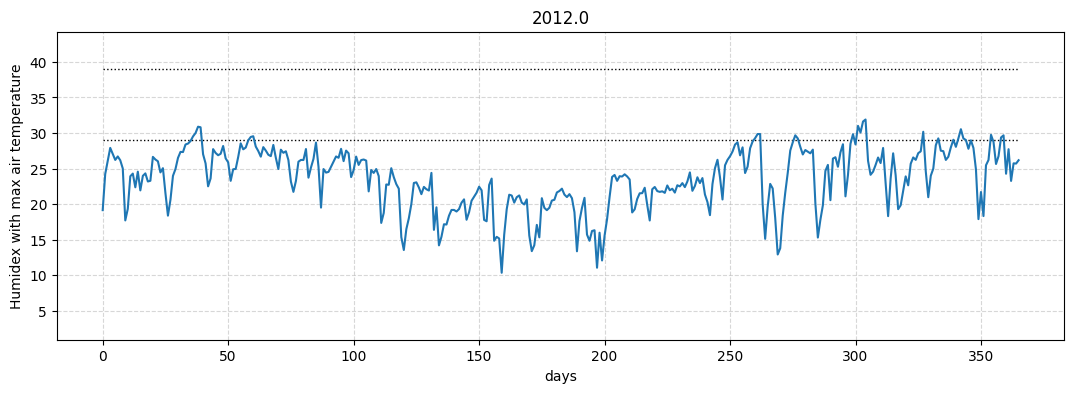

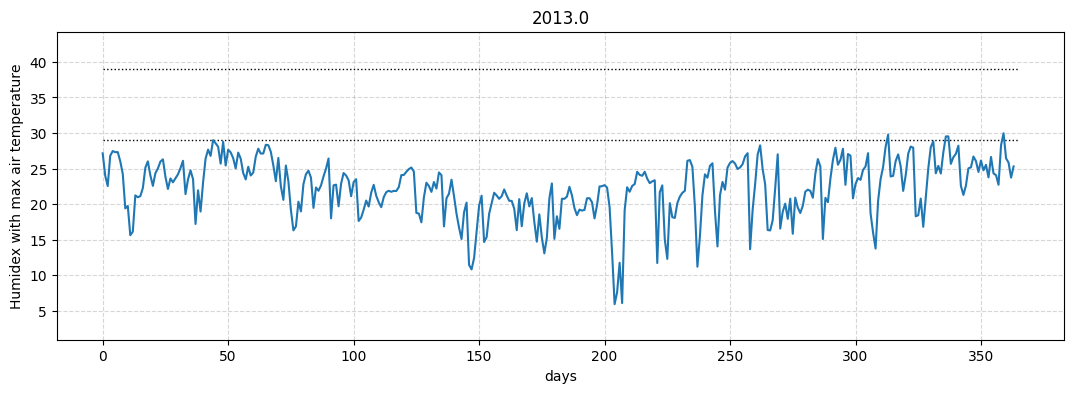

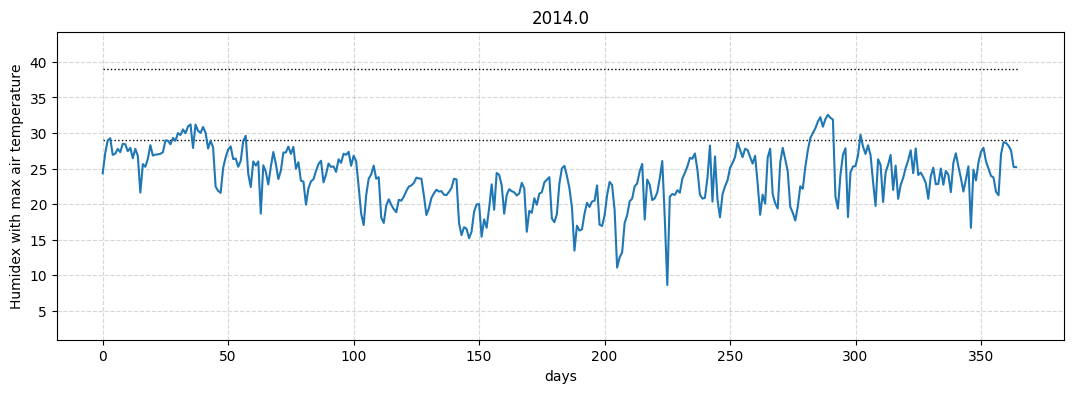

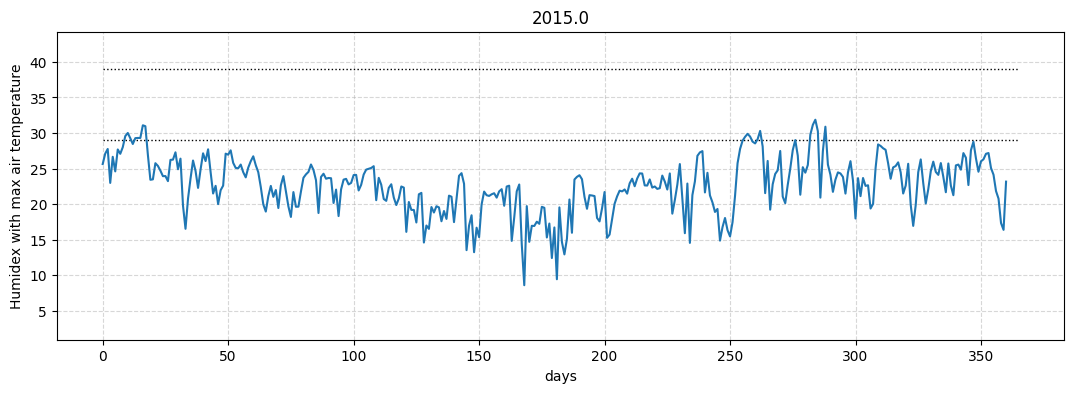

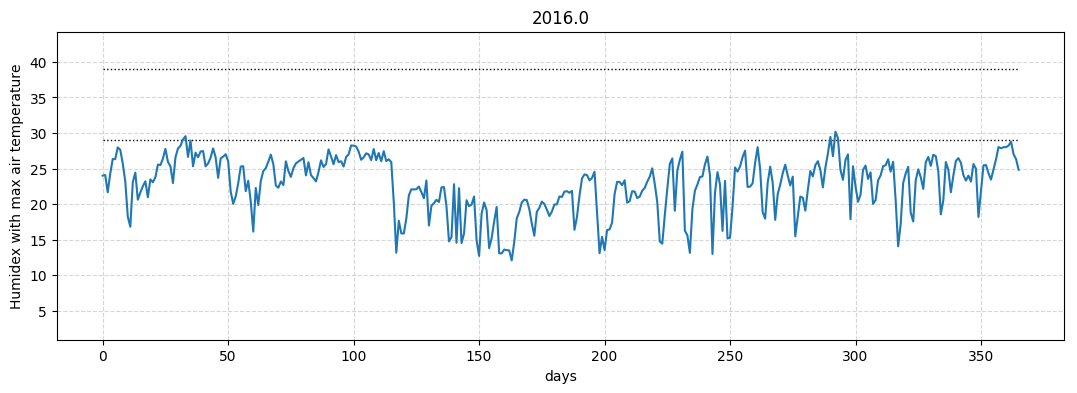

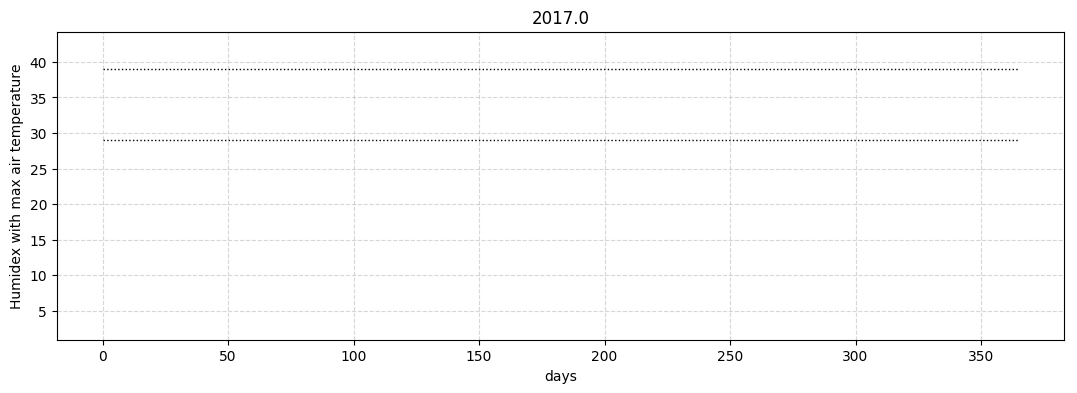

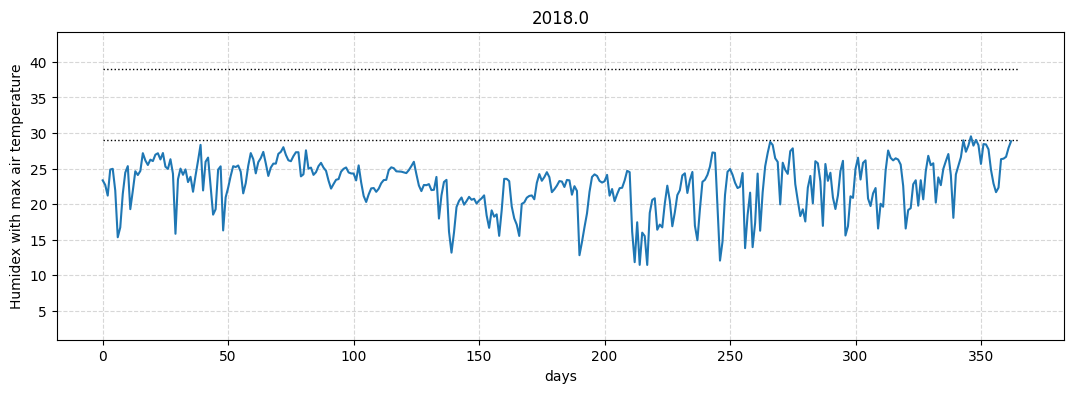

In [38]:
var1 = 'h_max'

min_y_value = data[var1].min() - 5
max_y_value = data[var1].max() + 5


for i in data['YEAR'].unique():
    data_2plot = data[(data['YEAR'] == i)]

    plt.figure(figsize=(13,4))
    plt.title(str(i))    
    plt.plot(np.arange(data_2plot.shape[0]),data_2plot[var1])
    
    plt.hlines(y=29,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    plt.hlines(y=39,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    plt.hlines(y=45,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    plt.hlines(y=54,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    
    plt.xlabel('days')
    plt.ylabel('Humidex with max air temperature')
    plt.grid(True, linestyle='--', alpha = 0.5)
#     plt.xlim(min_x_value, max_x_value)
    plt.ylim(min_y_value, max_y_value)
    plt.show()

Looking to humidex using tmax as t it seems to get some days with some disconfort, but nothing very expressive

# 2 - Using magnus aproximation

With o.1% of precision when:

-30 < = T <= 35 and
0 <= UR <= 100

$T_{dp} = {c\gamma _m (T,UR) \over b - \gamma _m (T,UR)}$, where:

$ \gamma _m (T,UR)  =  ln({UR \over 100}exp((b - {T \over d})*({T \over c + T})))$  

In [41]:
a = 6.112
b = 18.678
c = 257.14
d = 234.5

def get_gamma(T,UR):
    t1 = b-T/d
    t2 = T/(c+T)
    
    g = np.log((UR/100)*np.exp(t1*t2))
    return g

def get_td2(T,UR):
    g = get_gamma(T,UR)
    
    h = c*g/(b - g)
    
    return h

In [42]:
data['td_min2'] = get_td2(data[temp_vars[0]],data['MEAN_N_AIRMTR_PCT10'])
data['td_max2'] = get_td2(data[temp_vars[2]],data['MEAN_N_AIRMTR_PCT10'])
data['td_mean2'] = get_td2(data[temp_vars[1]],data['MEAN_N_AIRMTR_PCT10'])

In [43]:
# Getting humidex

data['h_min2'] = get_humidex(data[temp_vars[0]],data['td_min2'])
data['h_max2'] = get_humidex(data[temp_vars[2]],data['td_max2'])
data['h_mean2'] = get_humidex(data[temp_vars[1]],data['td_mean2'])

c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


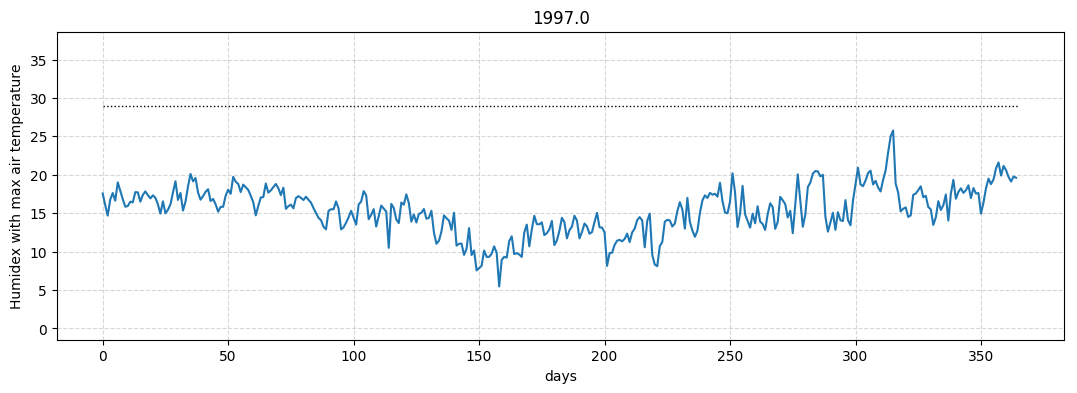

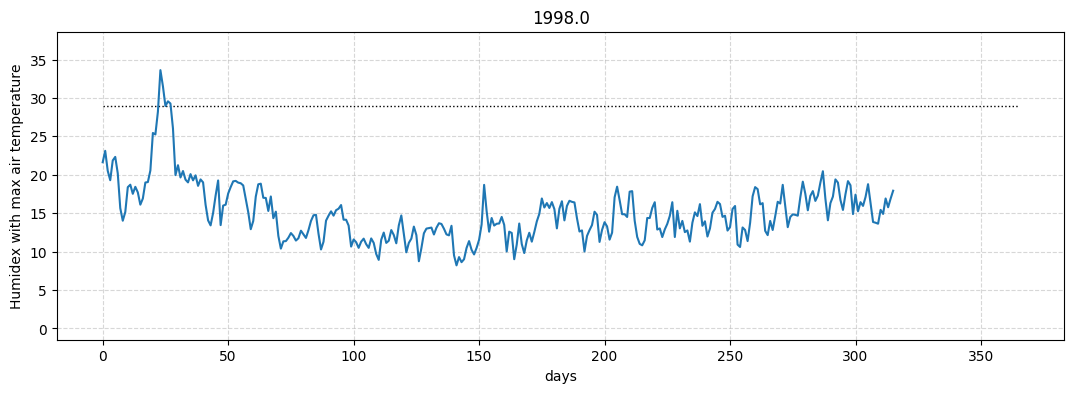

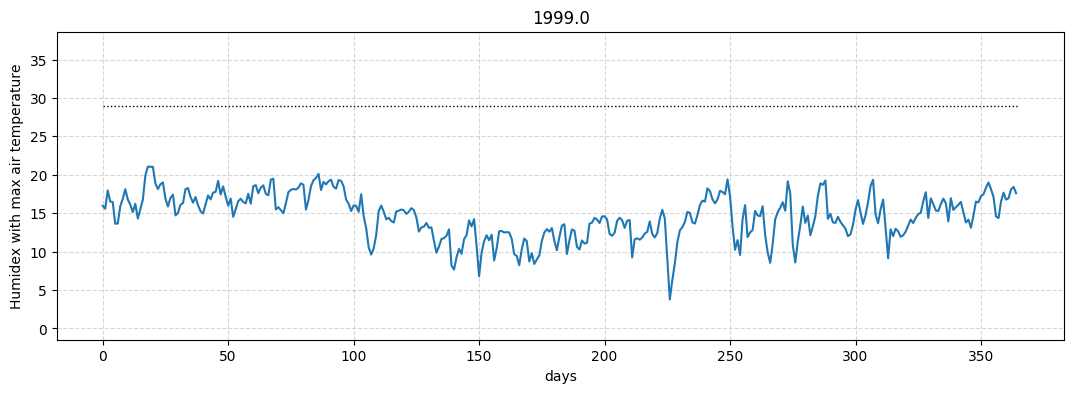

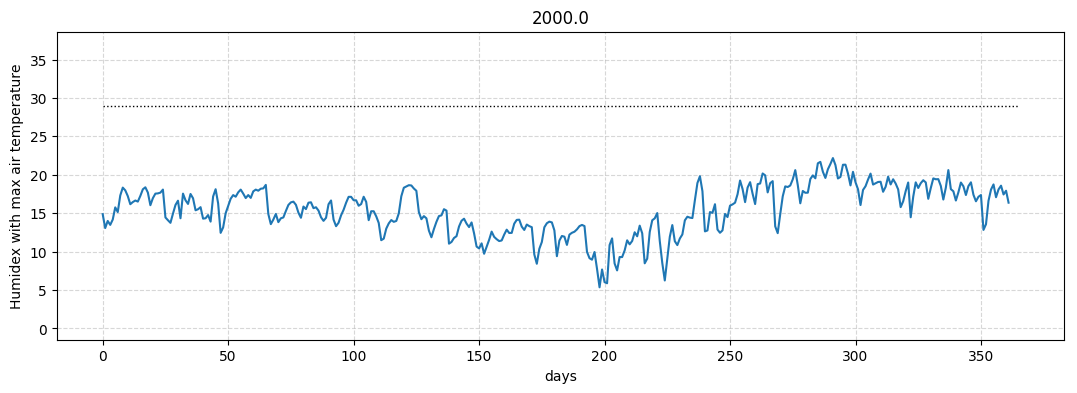

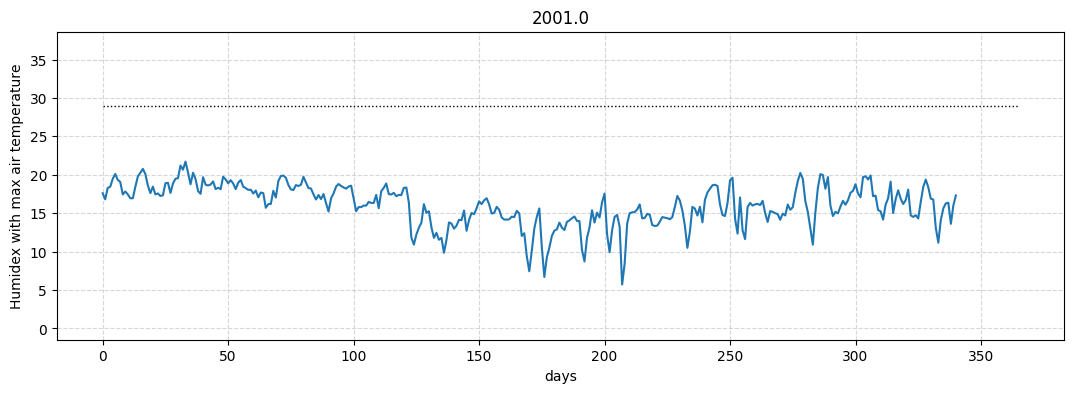

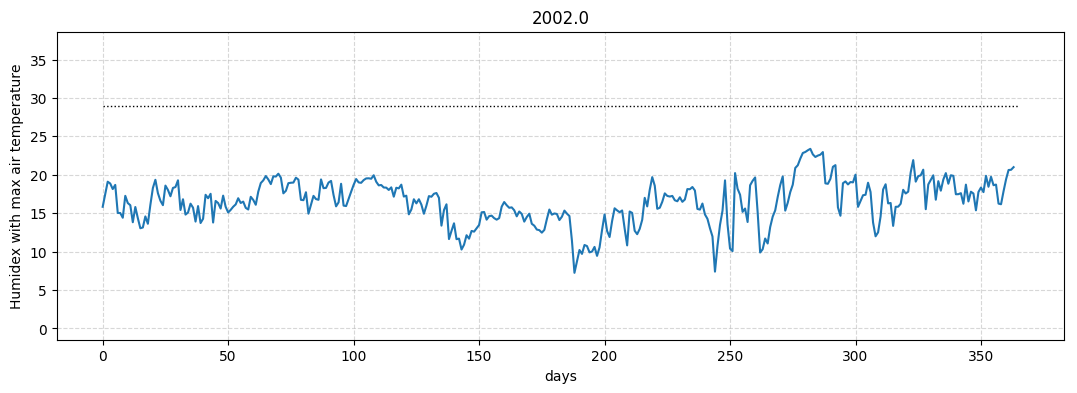

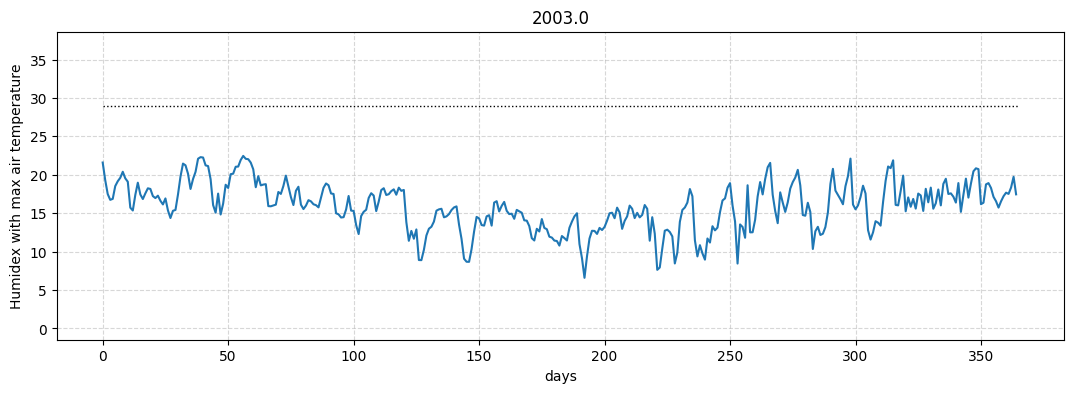

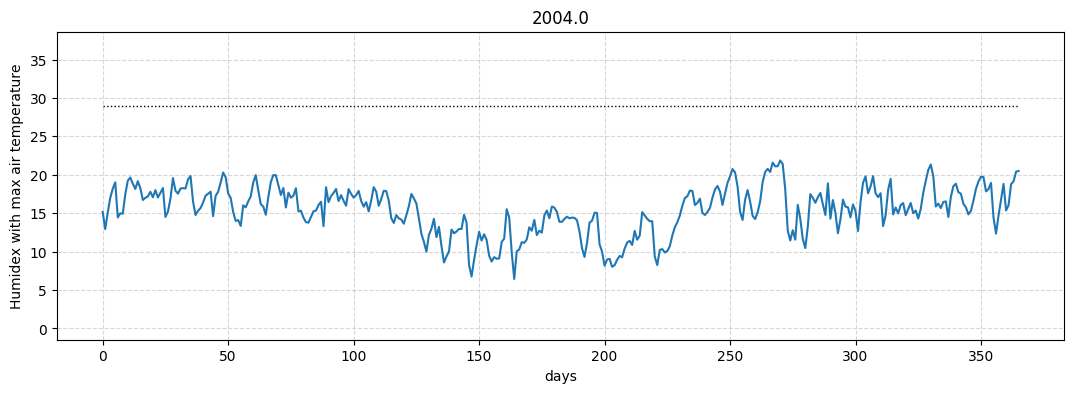

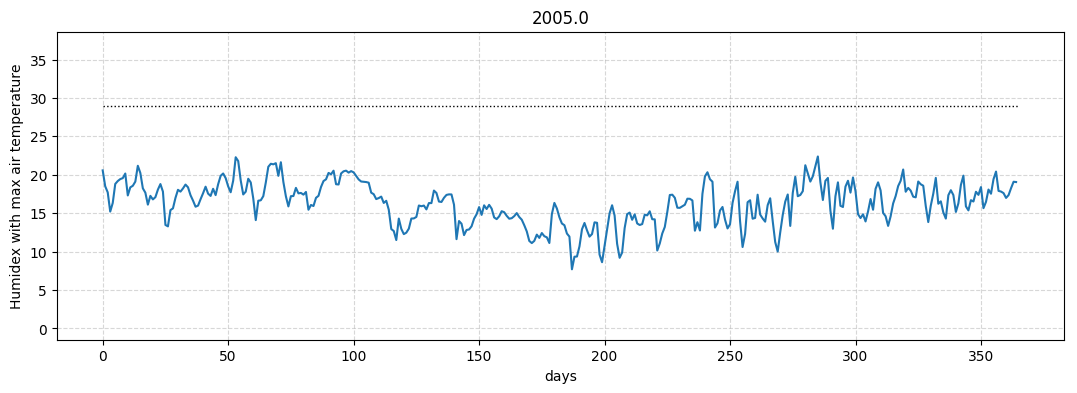

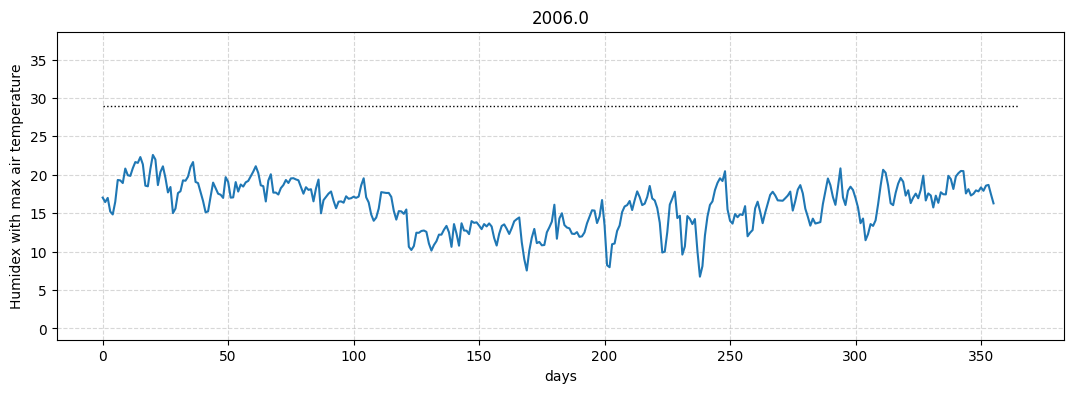

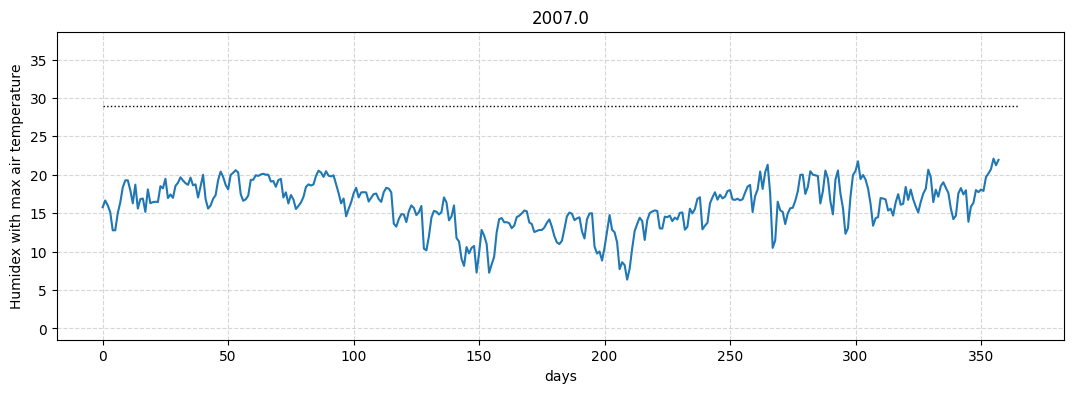

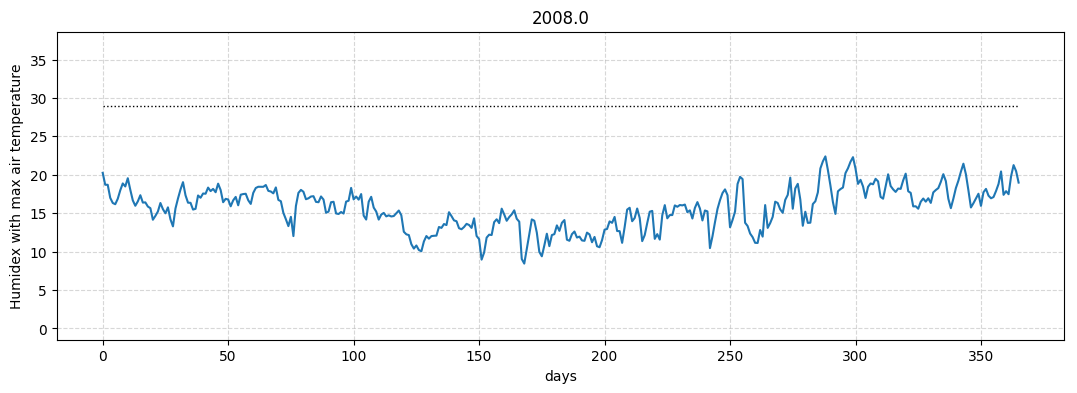

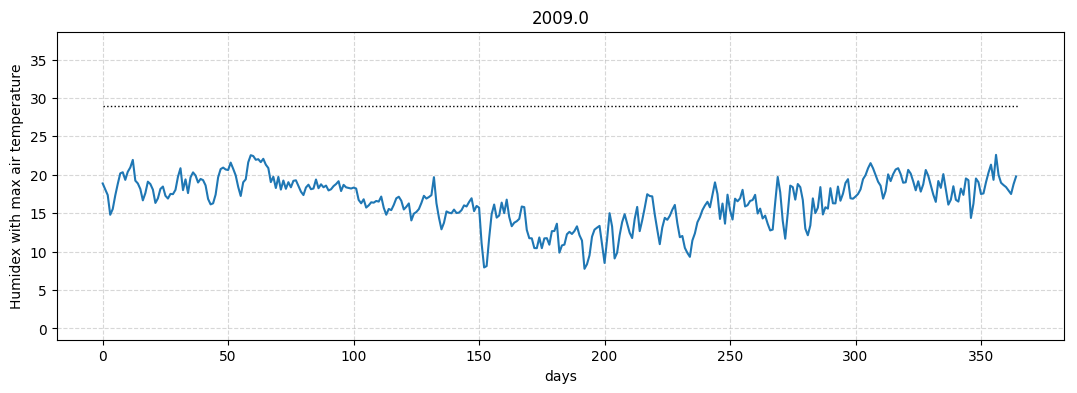

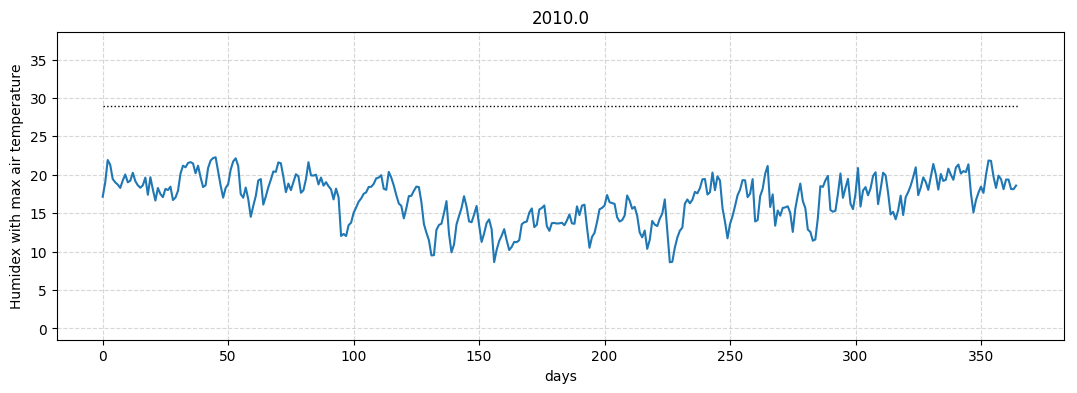

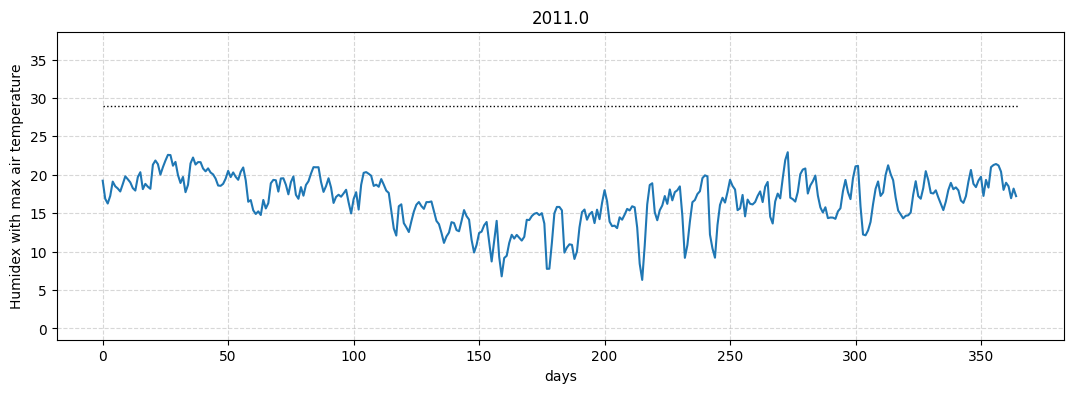

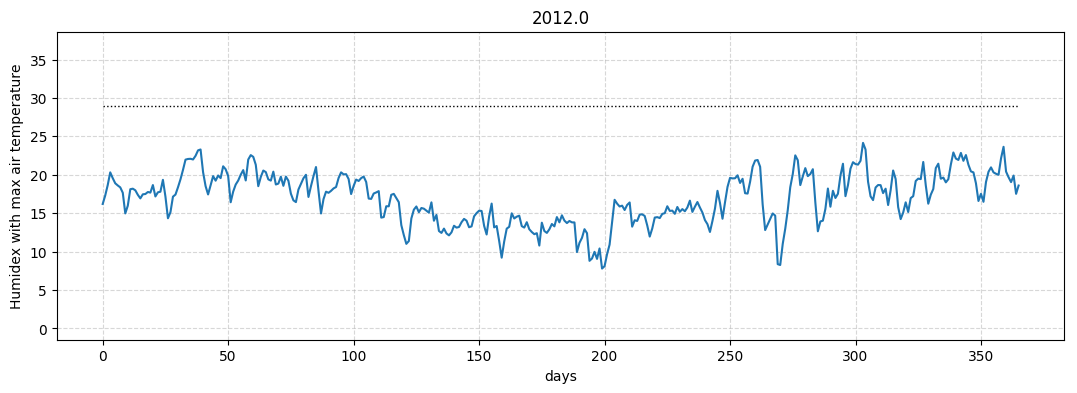

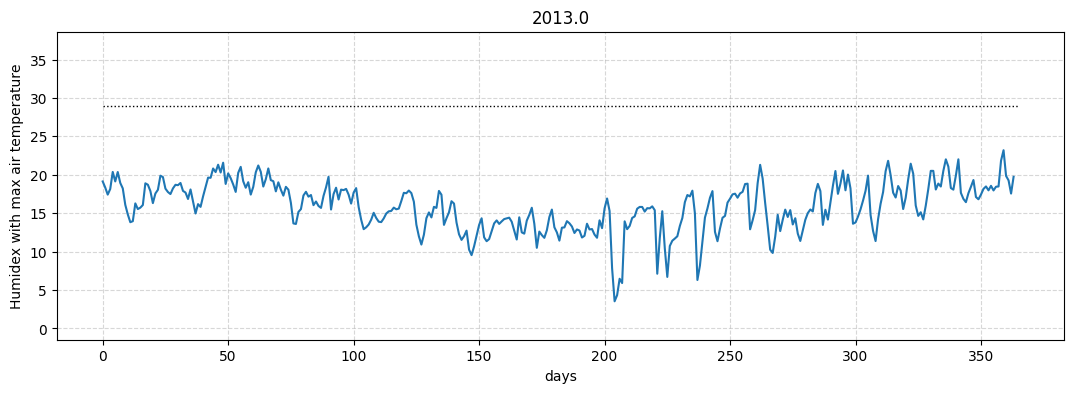

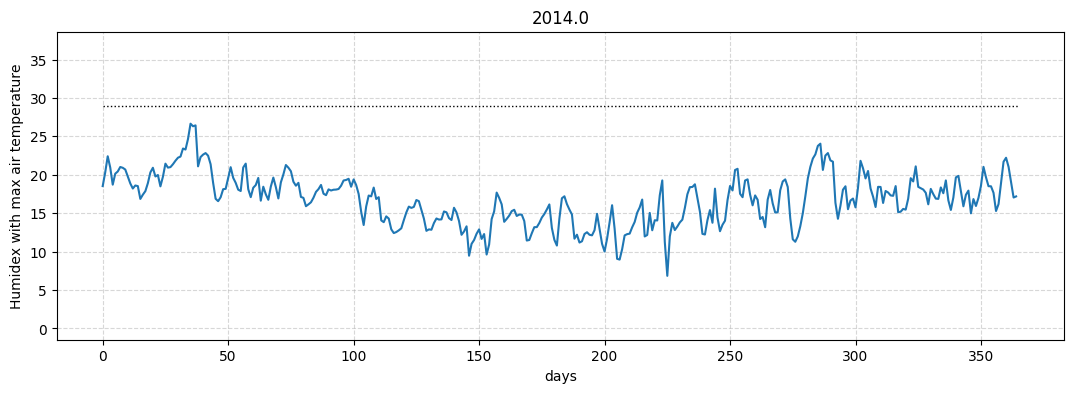

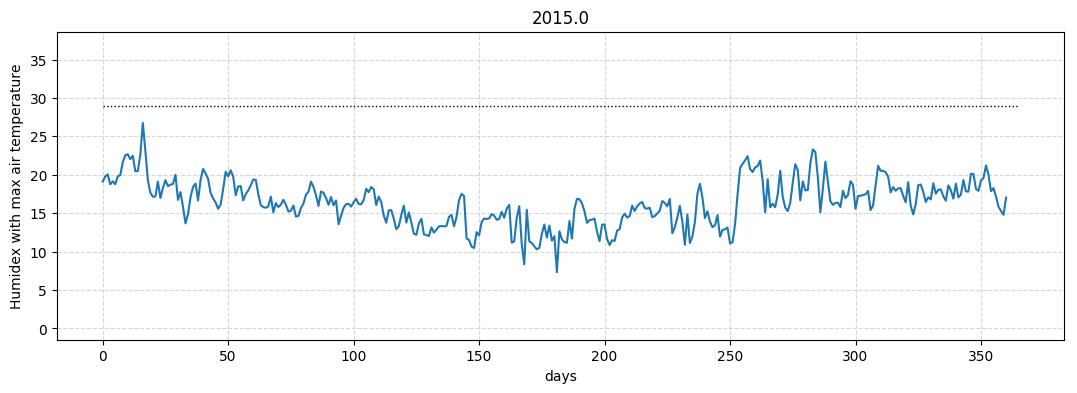

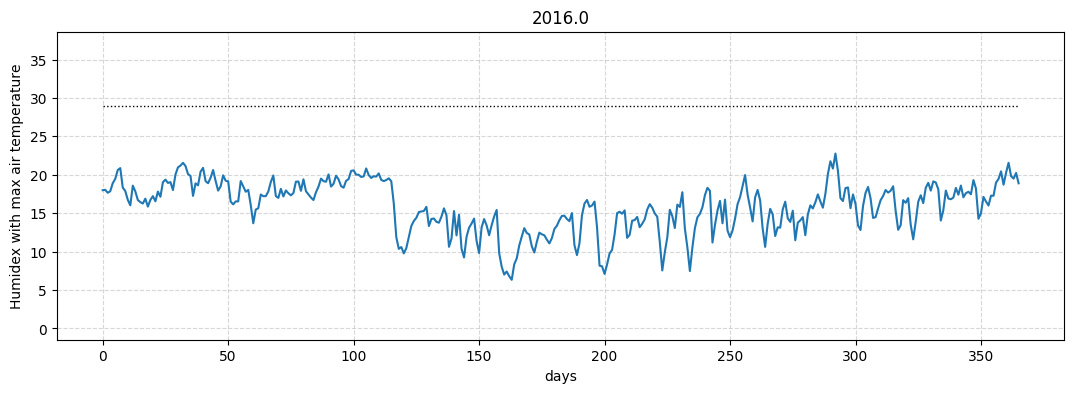

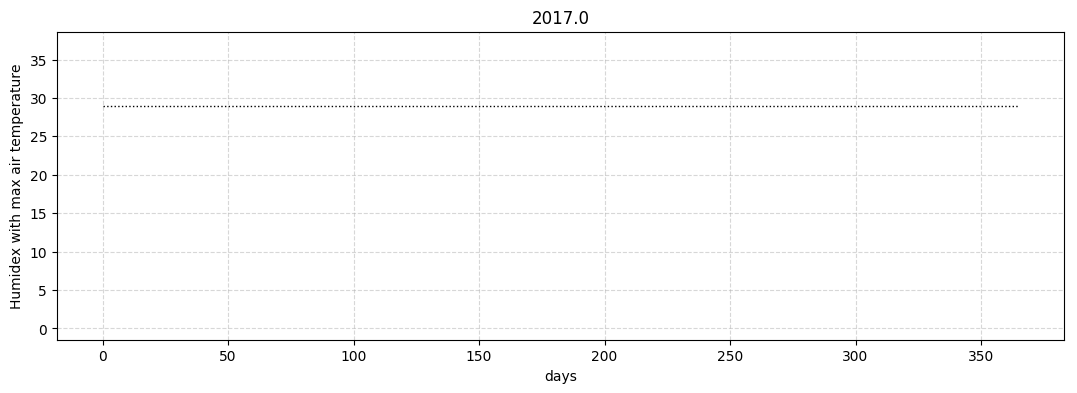

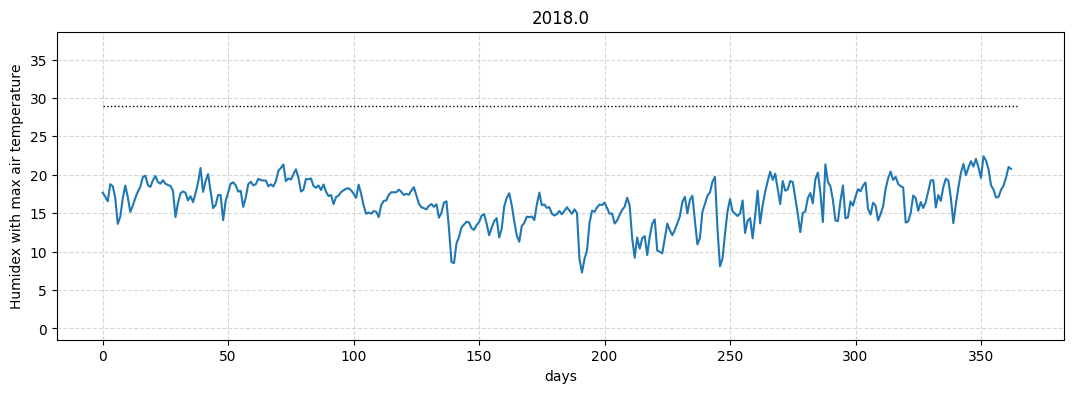

In [45]:
var1 = 'h_mean2'

min_y_value = data[var1].min() - 5
max_y_value = data[var1].max() + 5


for i in data['YEAR'].unique():
    data_2plot = data[(data['YEAR'] == i)]

    plt.figure(figsize=(13,4))
    plt.title(str(i))    
    plt.plot(np.arange(data_2plot.shape[0]),data_2plot[var1])
    
    plt.hlines(y=29,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    plt.hlines(y=39,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    plt.hlines(y=45,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    plt.hlines(y=54,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    
    plt.xlabel('days')
    plt.ylabel('Humidex with mean air temperature')
    plt.grid(True, linestyle='--', alpha = 0.5)
#     plt.xlim(min_x_value, max_x_value)
    plt.ylim(min_y_value, max_y_value)
    plt.show()

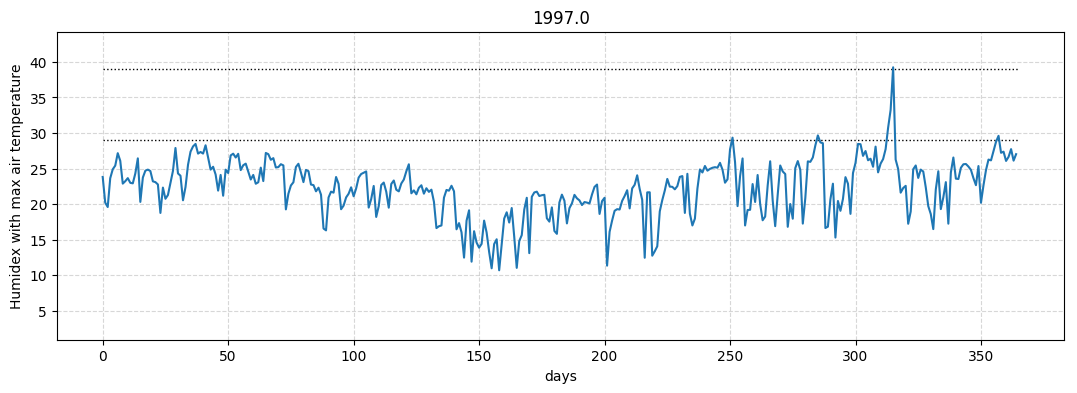

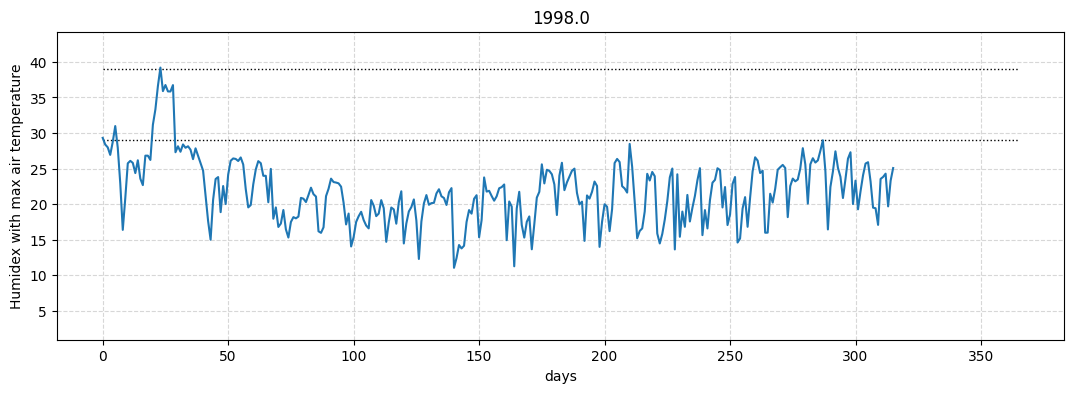

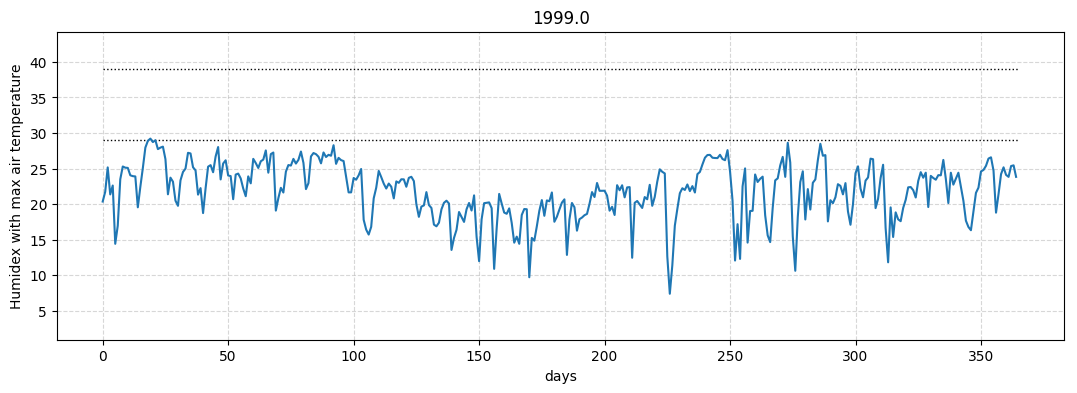

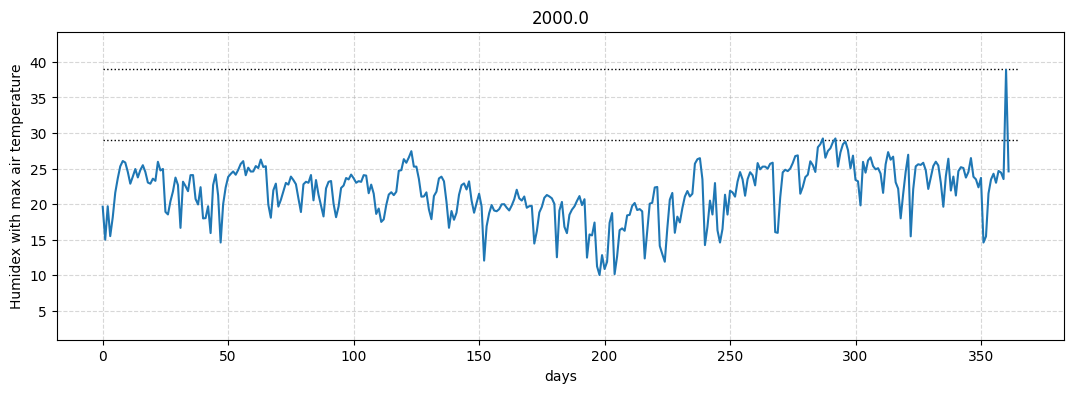

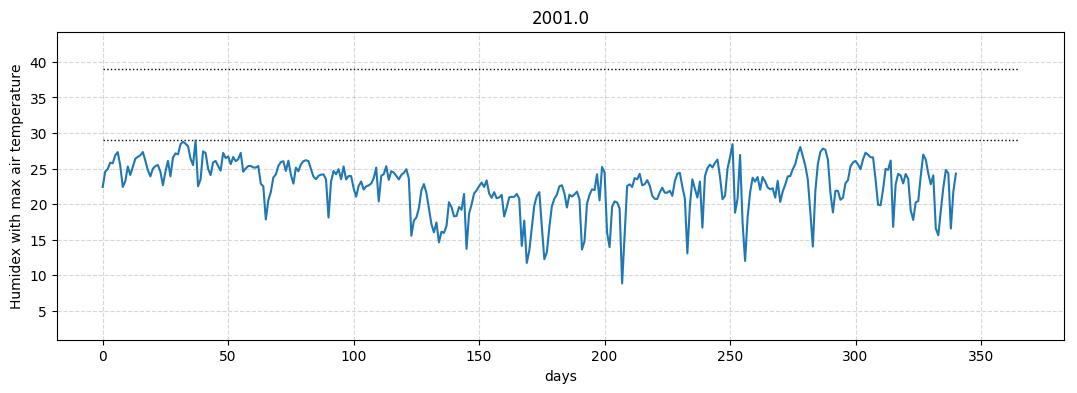

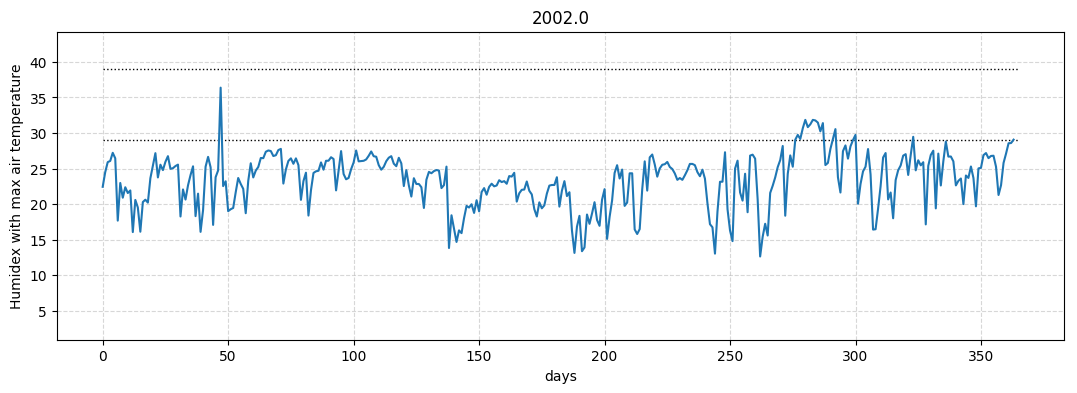

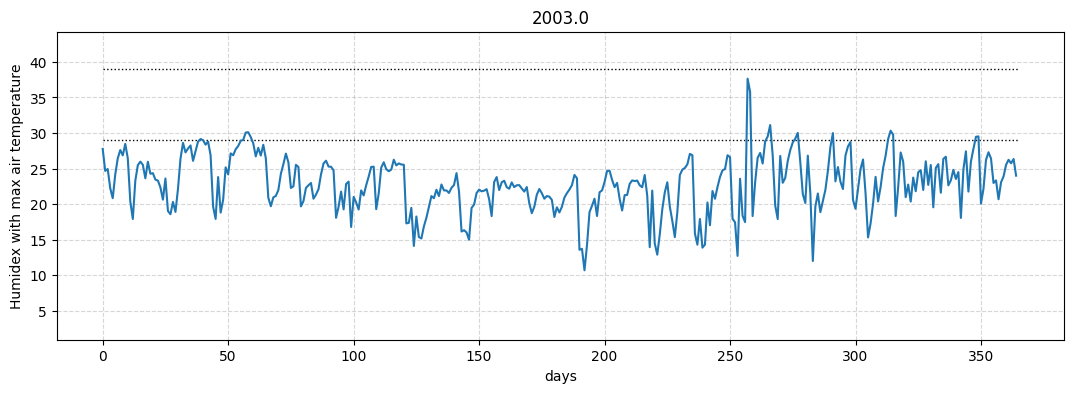

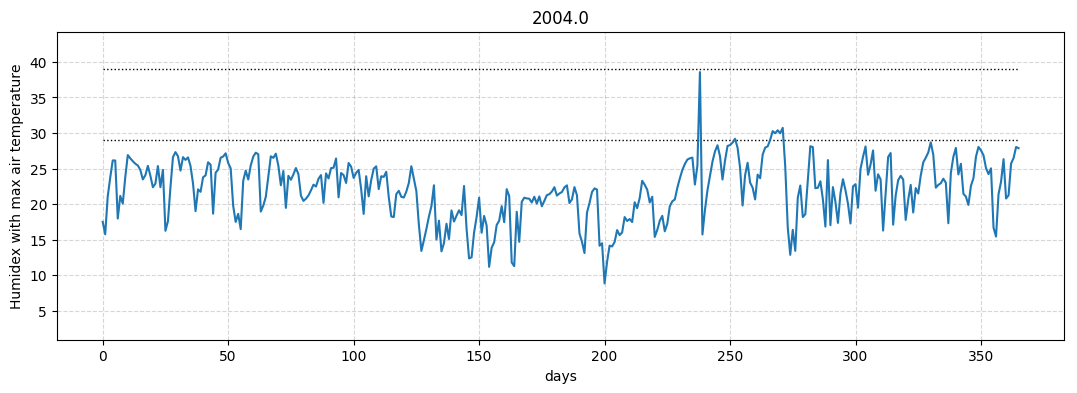

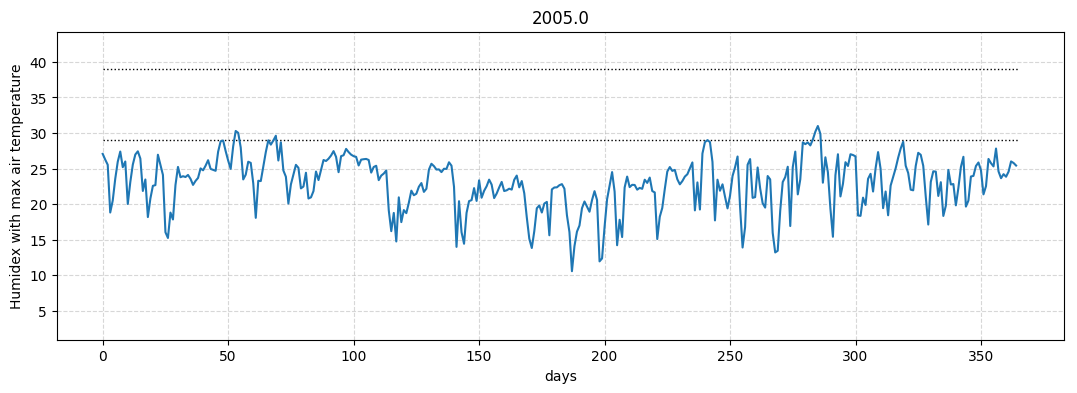

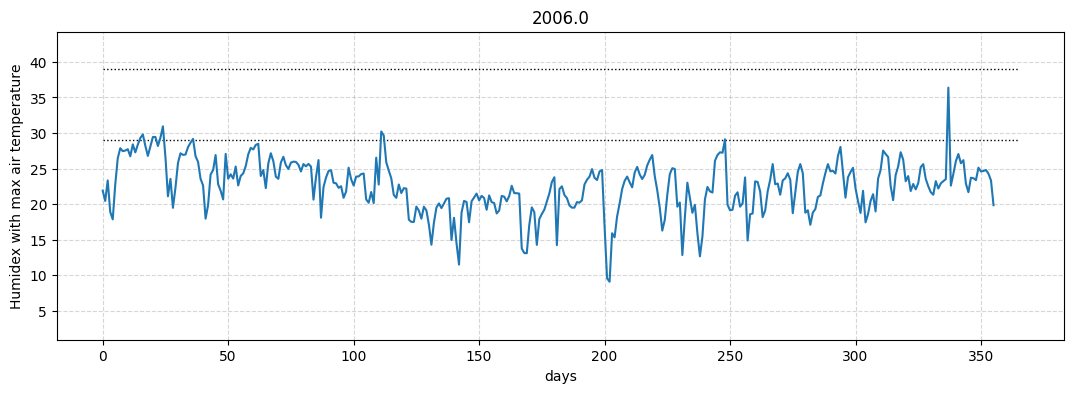

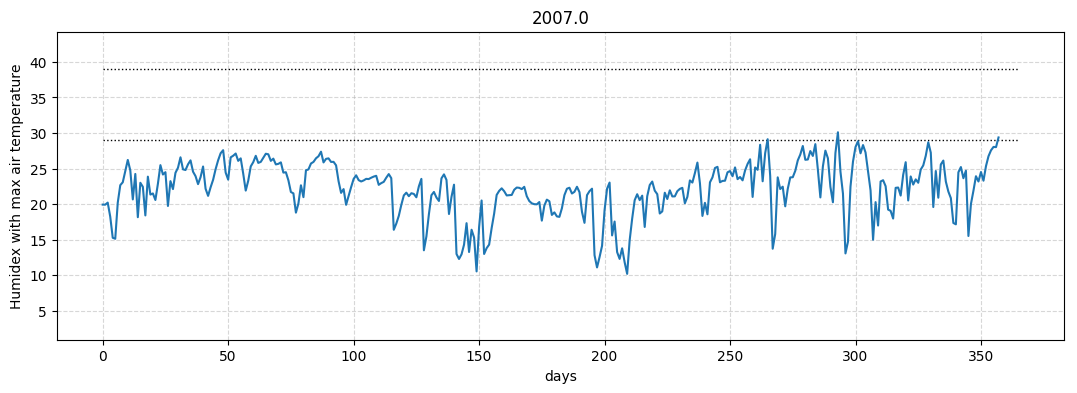

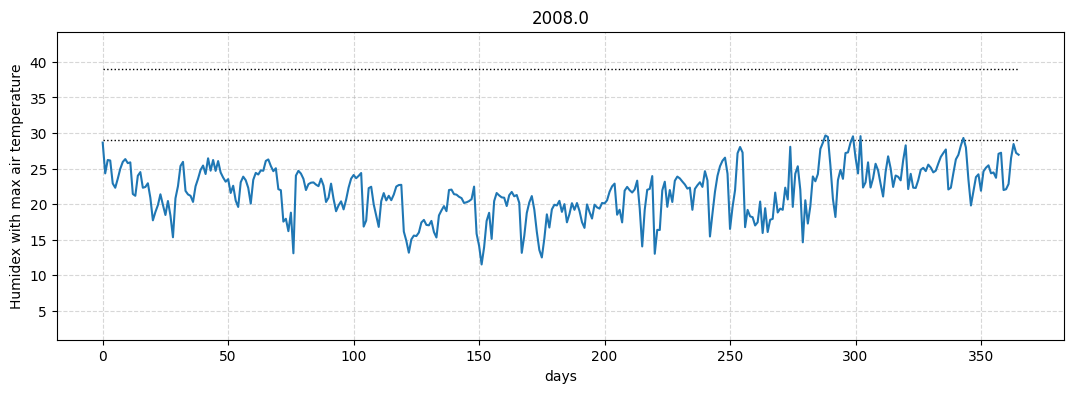

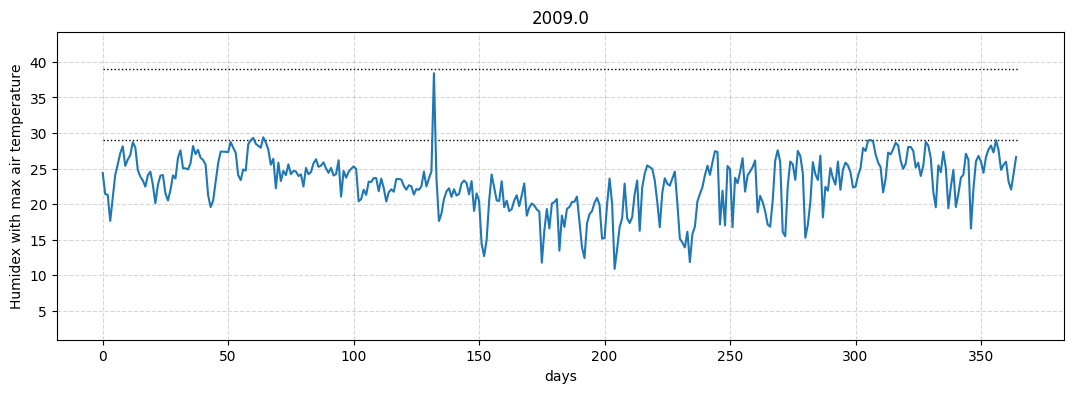

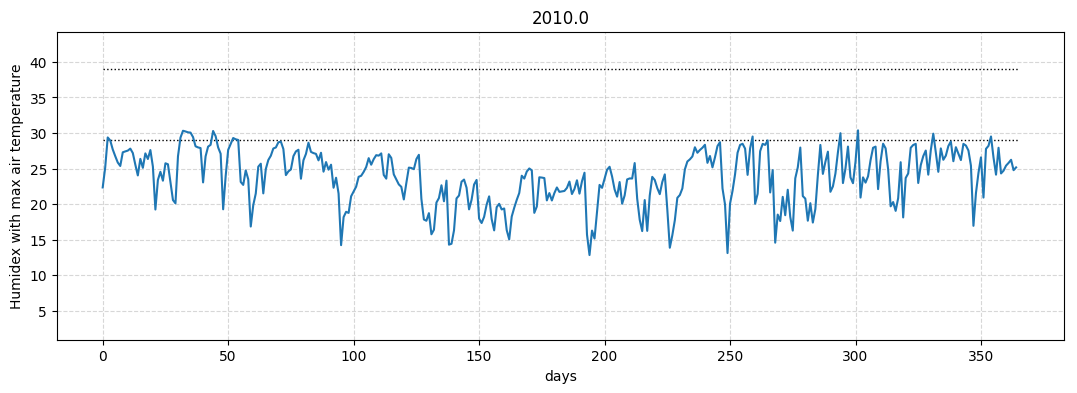

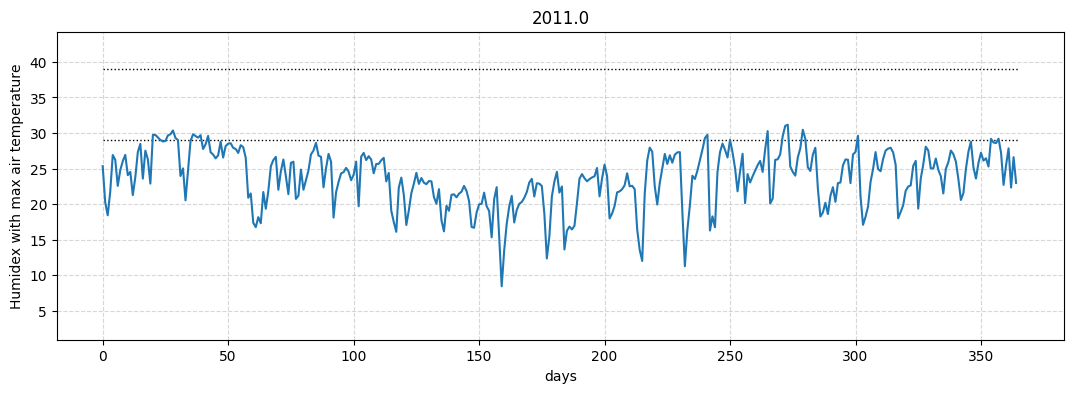

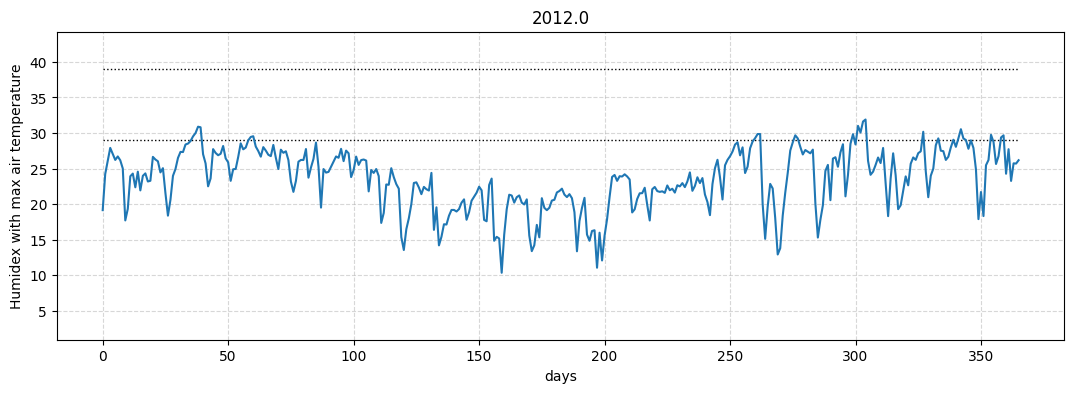

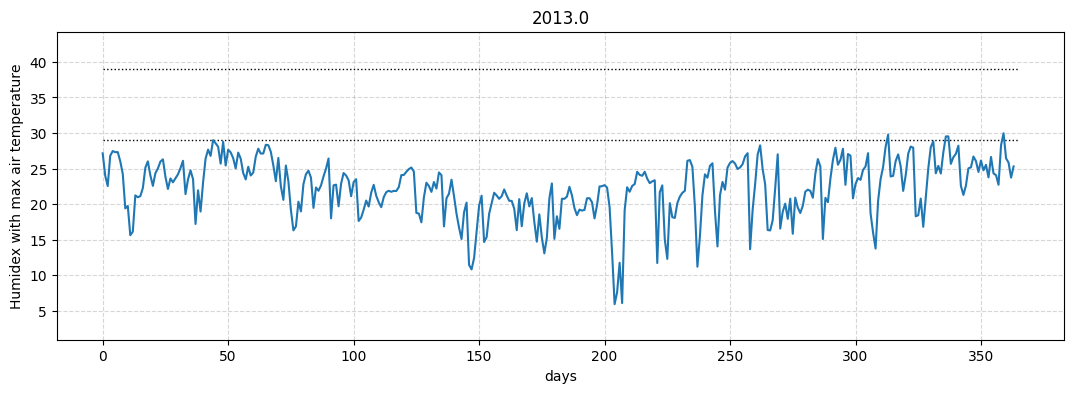

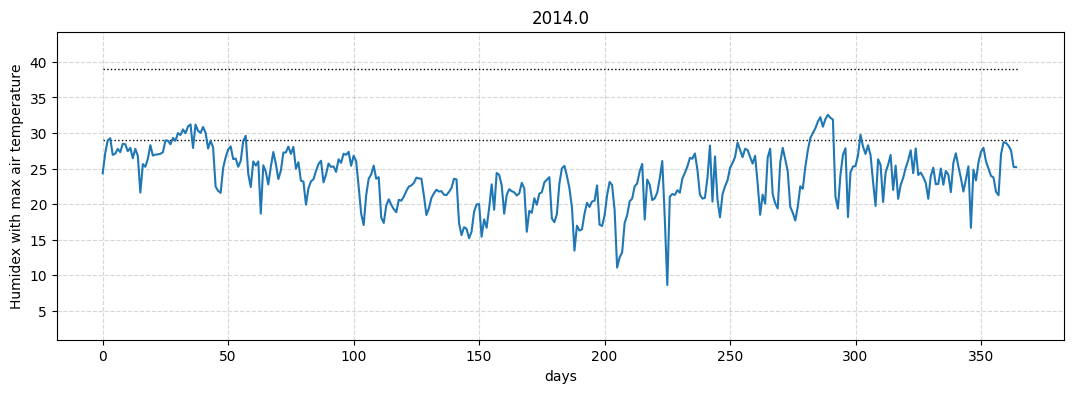

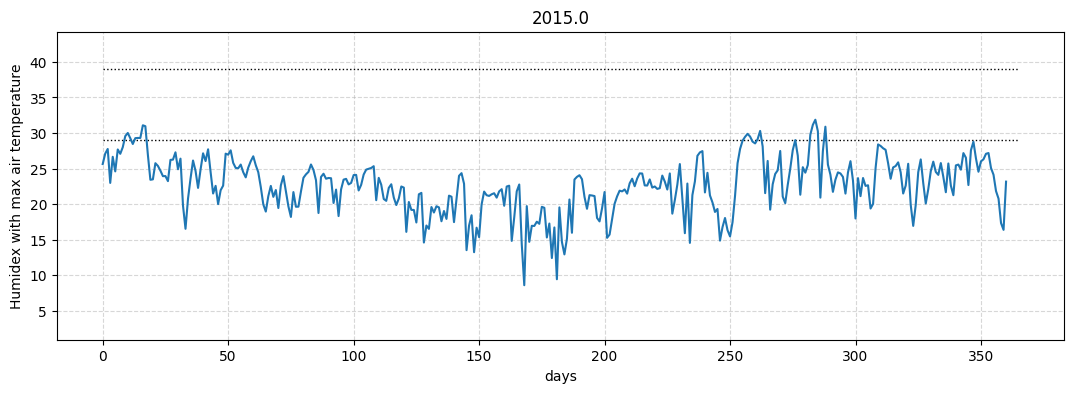

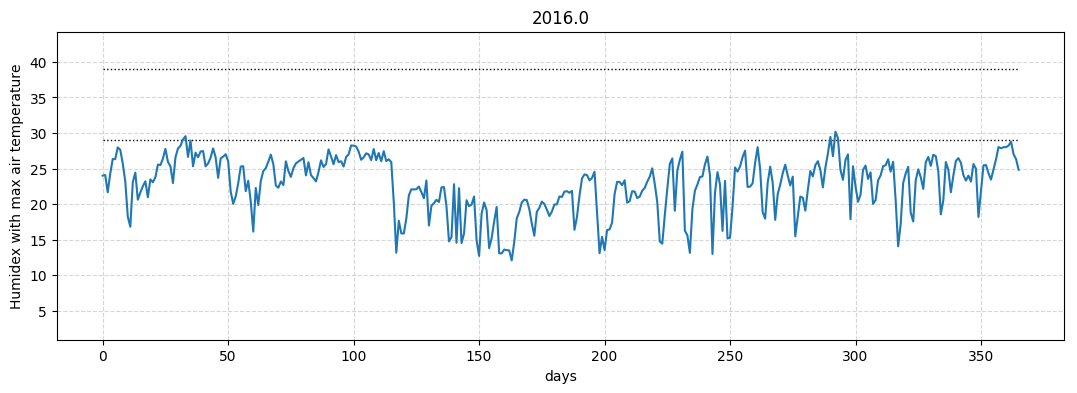

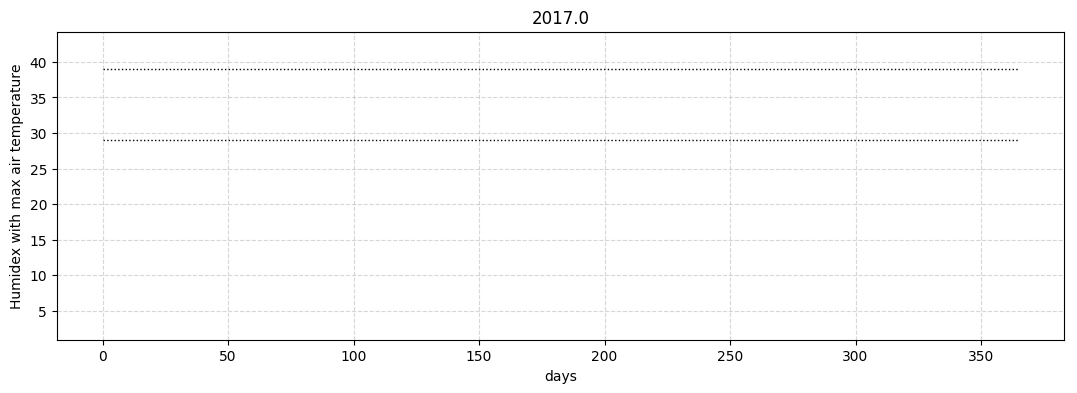

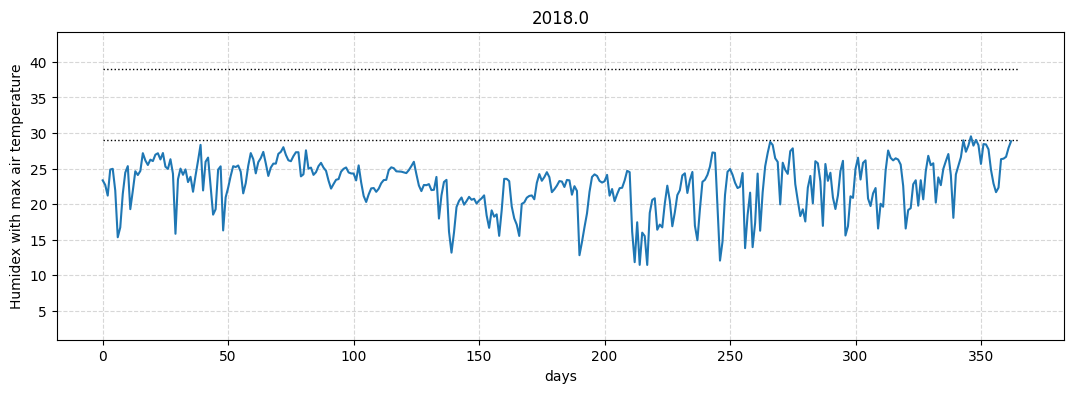

In [44]:
var1 = 'h_max2'

min_y_value = data[var1].min() - 5
max_y_value = data[var1].max() + 5


for i in data['YEAR'].unique():
    data_2plot = data[(data['YEAR'] == i)]

    plt.figure(figsize=(13,4))
    plt.title(str(i))    
    plt.plot(np.arange(data_2plot.shape[0]),data_2plot[var1])
    
    plt.hlines(y=29,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    plt.hlines(y=39,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    plt.hlines(y=45,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    plt.hlines(y=54,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    
    plt.xlabel('days')
    plt.ylabel('Humidex with max air temperature')
    plt.grid(True, linestyle='--', alpha = 0.5)
#     plt.xlim(min_x_value, max_x_value)
    plt.ylim(min_y_value, max_y_value)
    plt.show()

# Relations between HW and humidex values

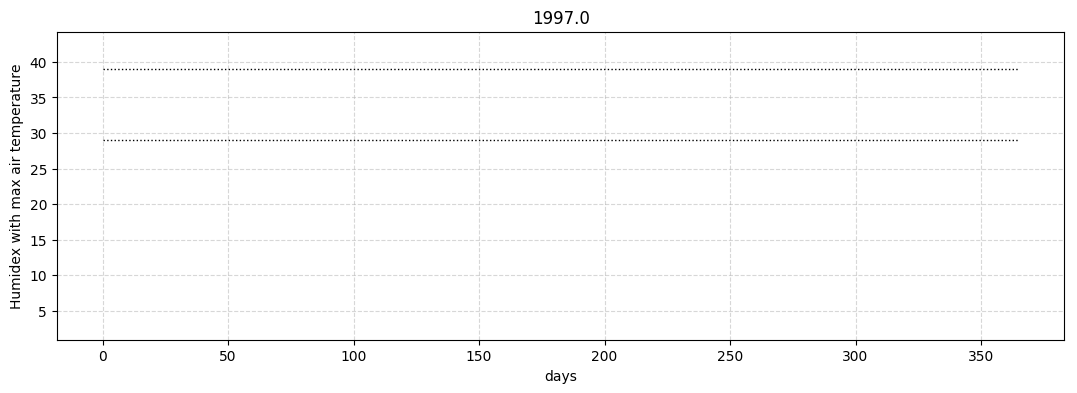

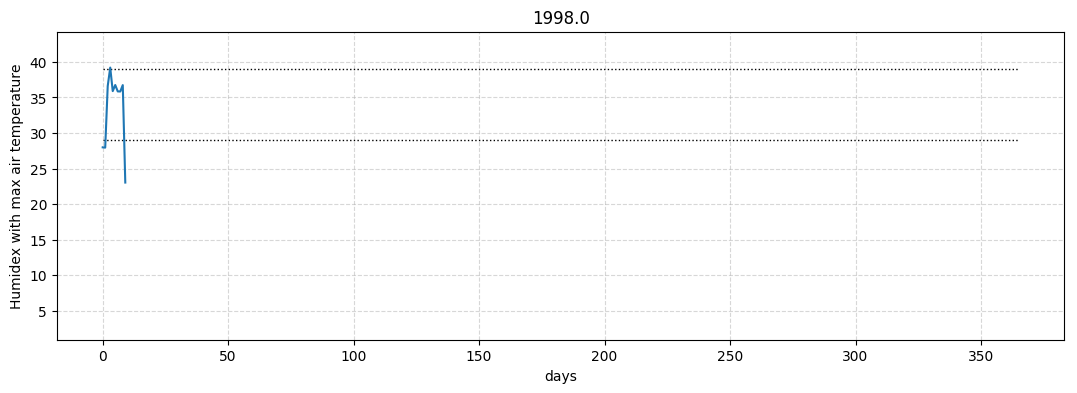

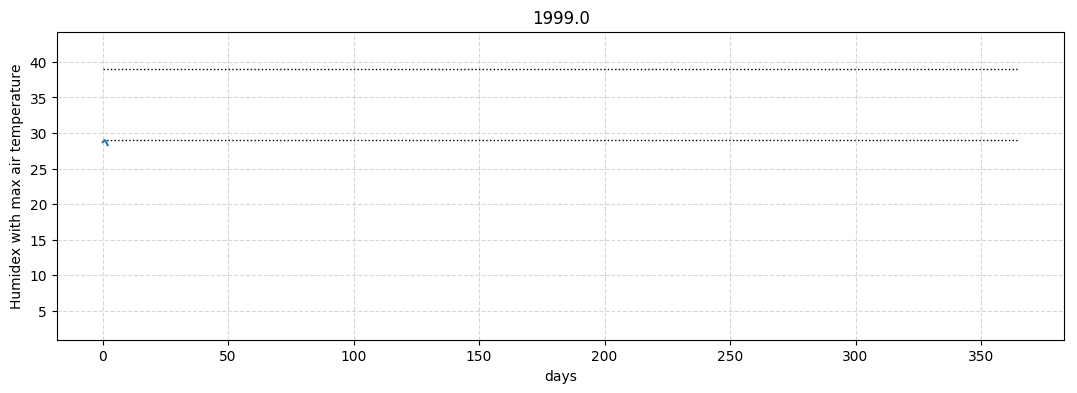

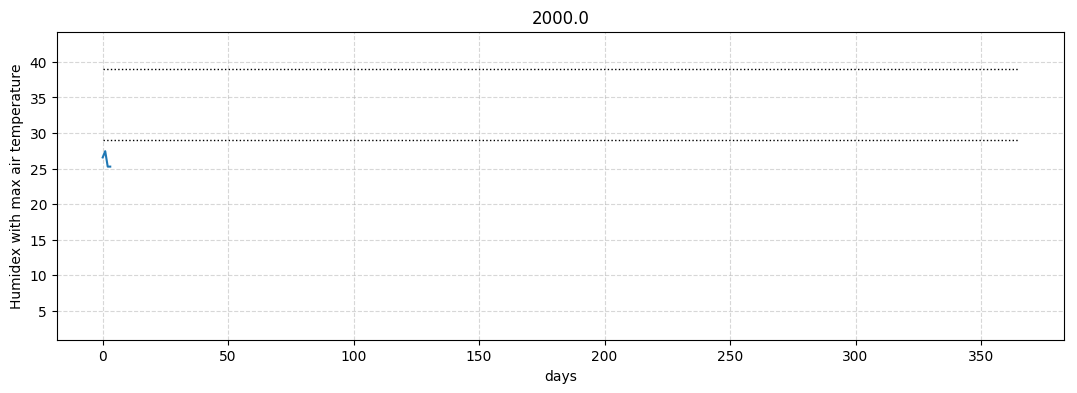

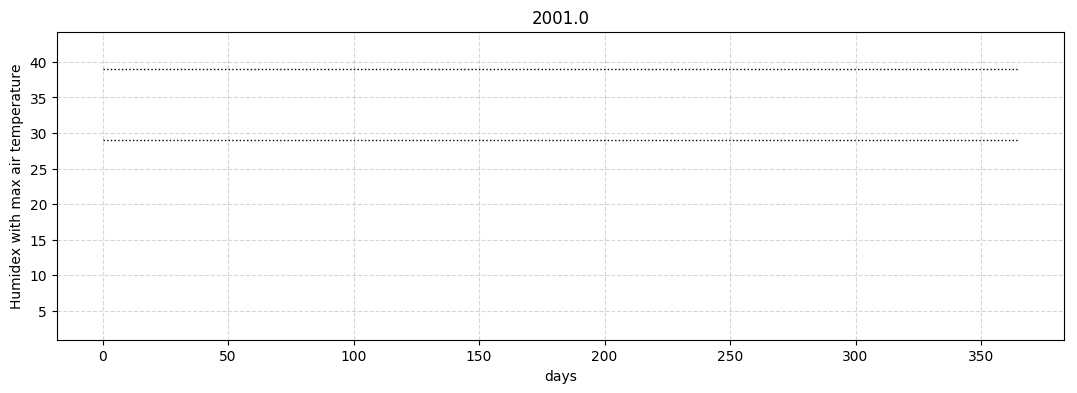

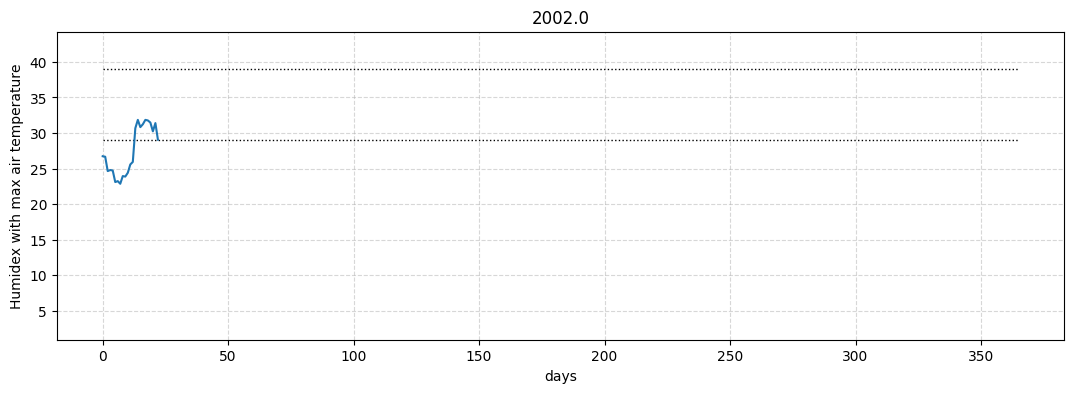

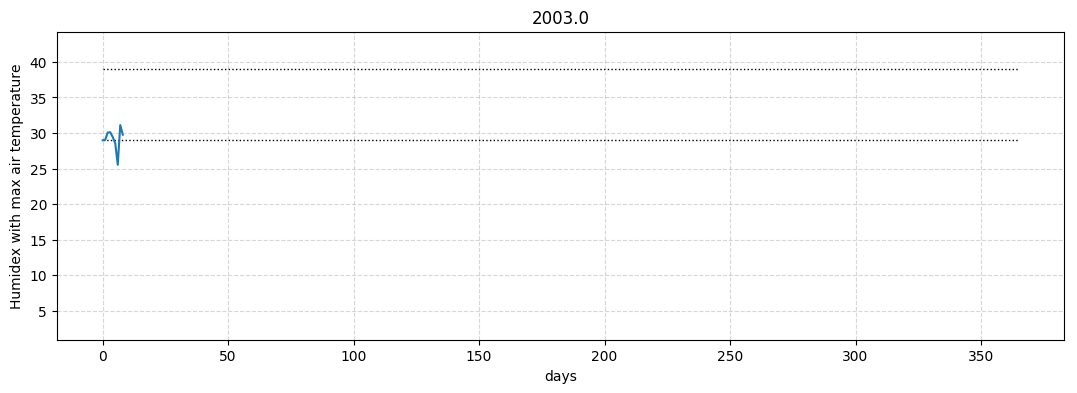

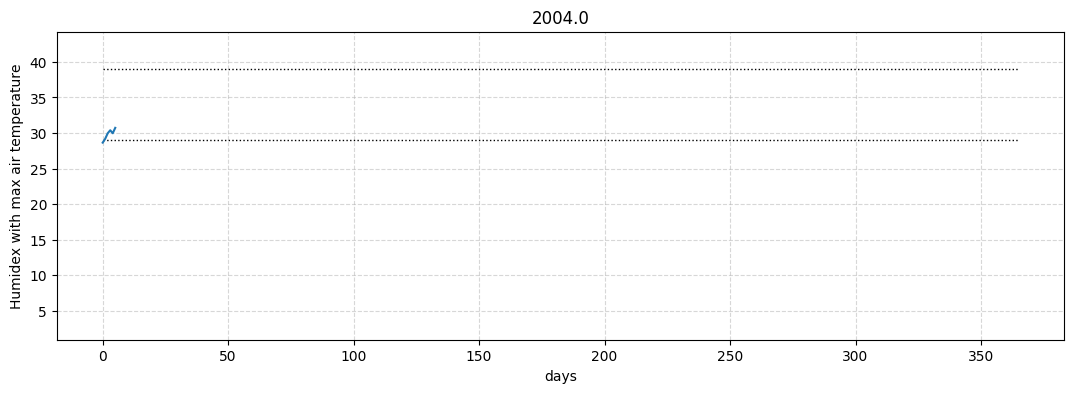

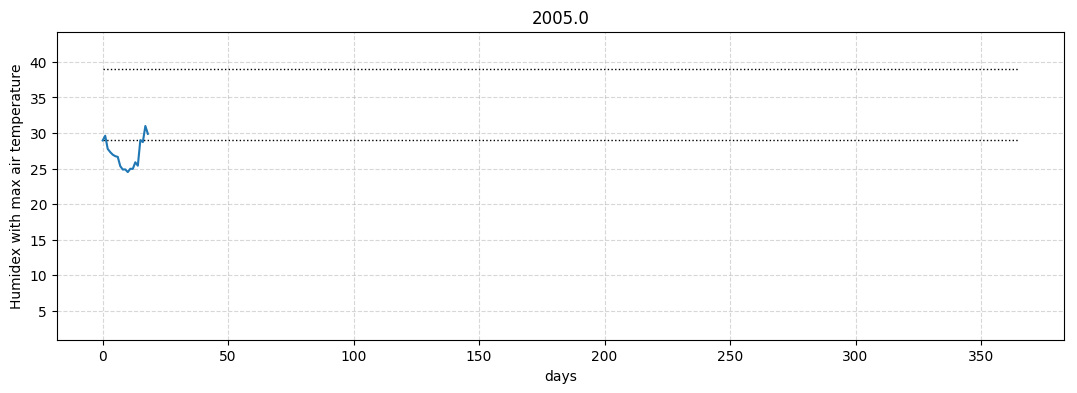

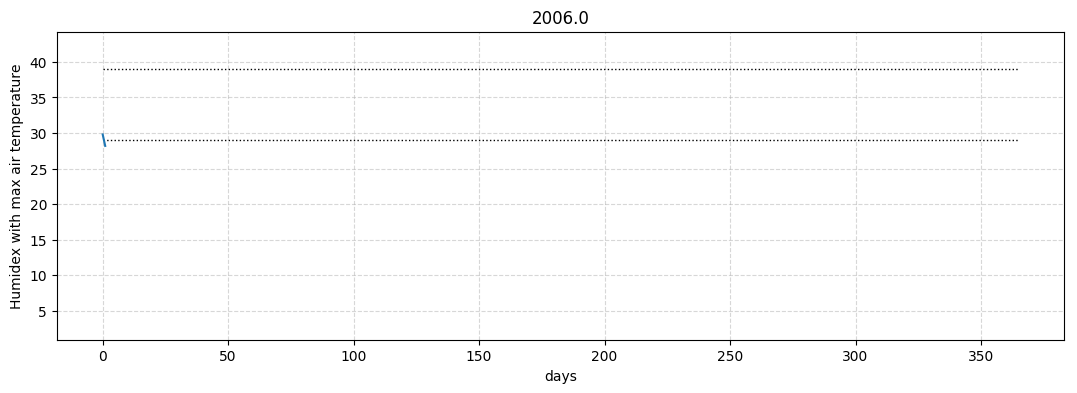

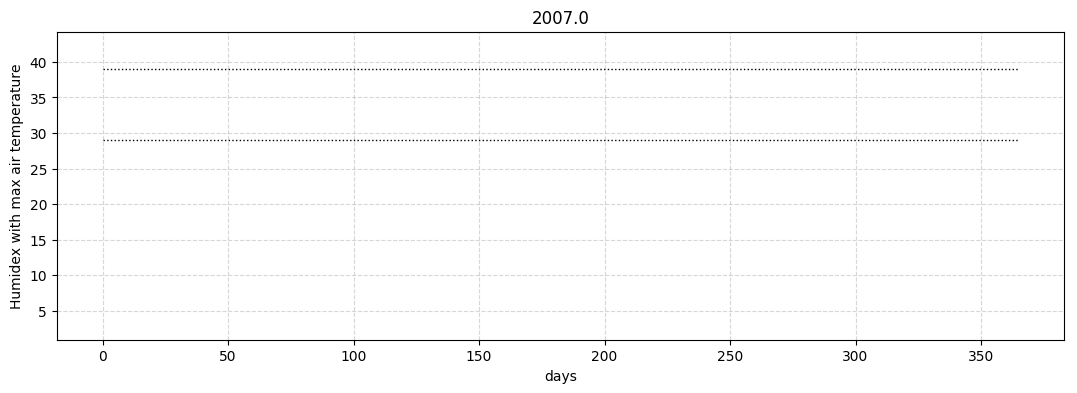

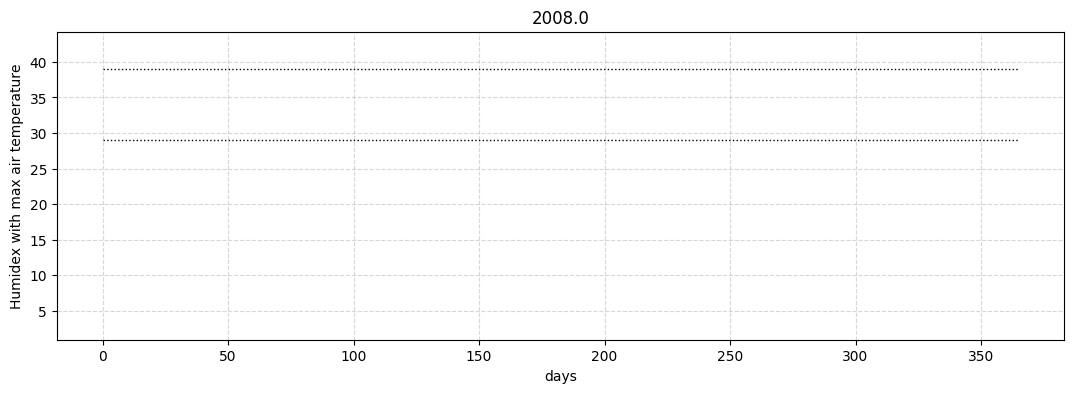

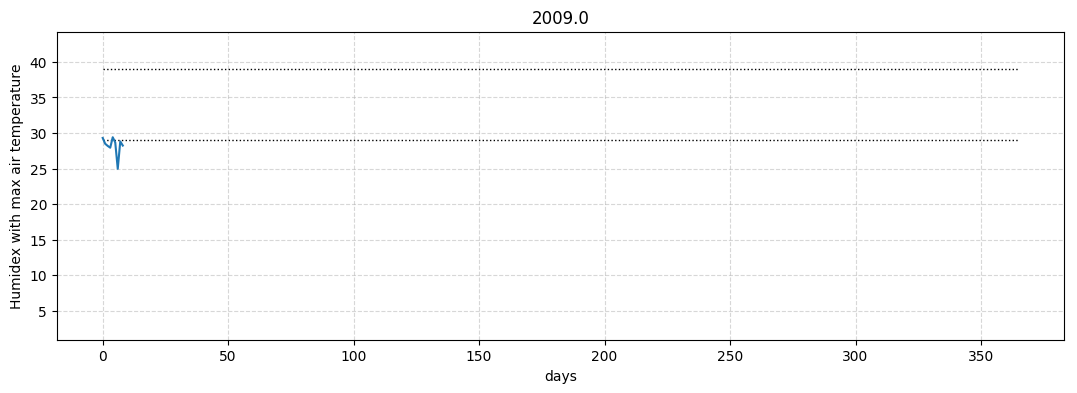

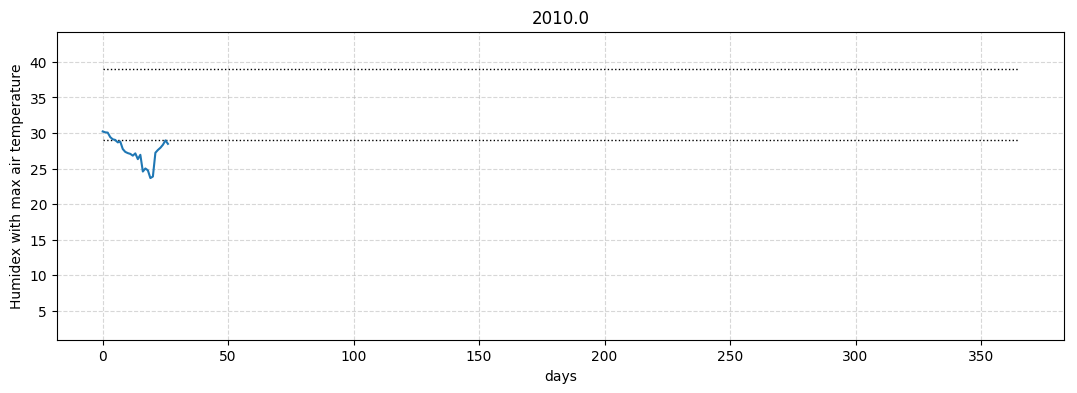

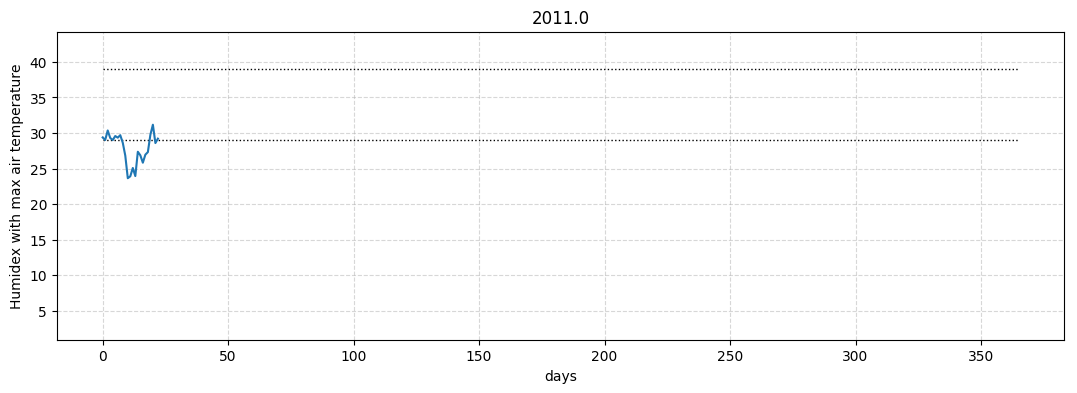

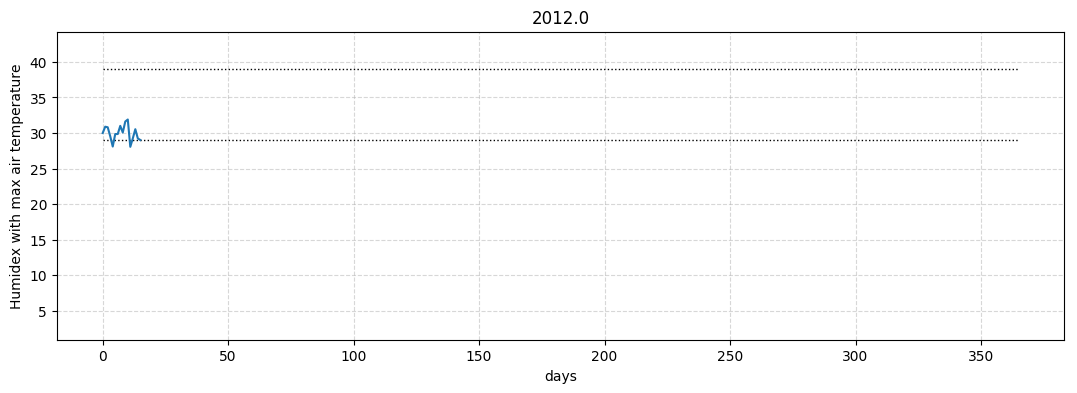

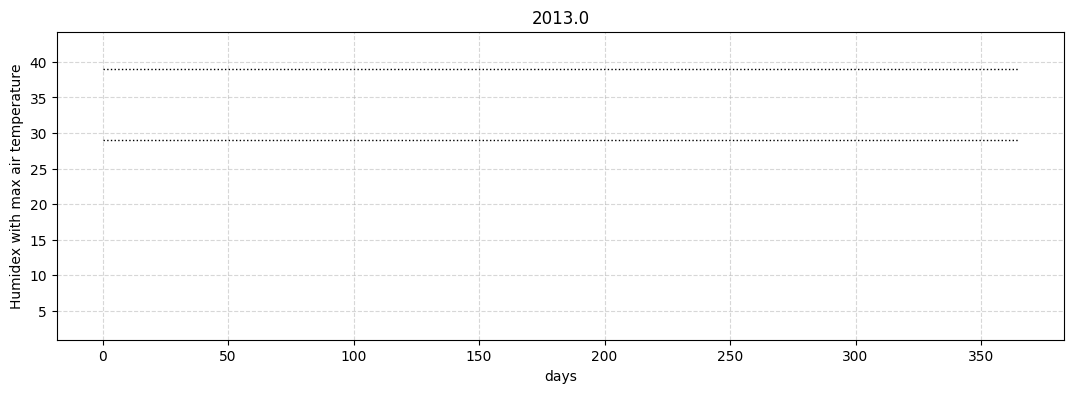

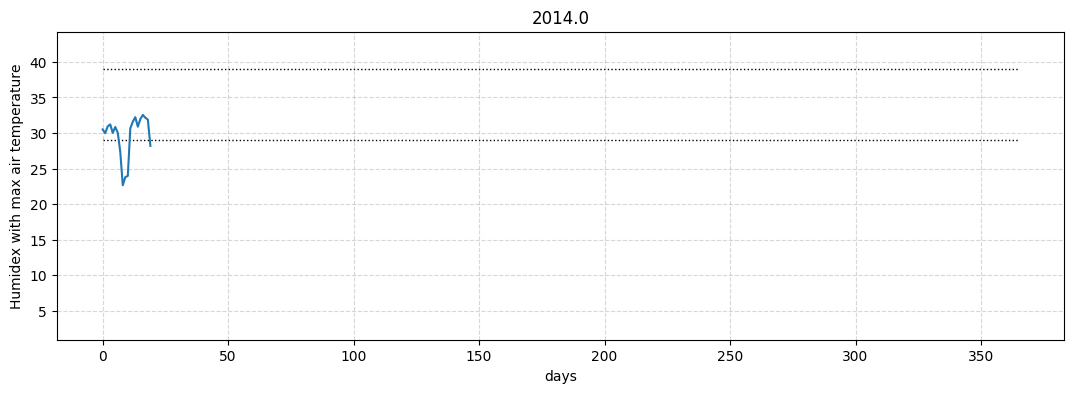

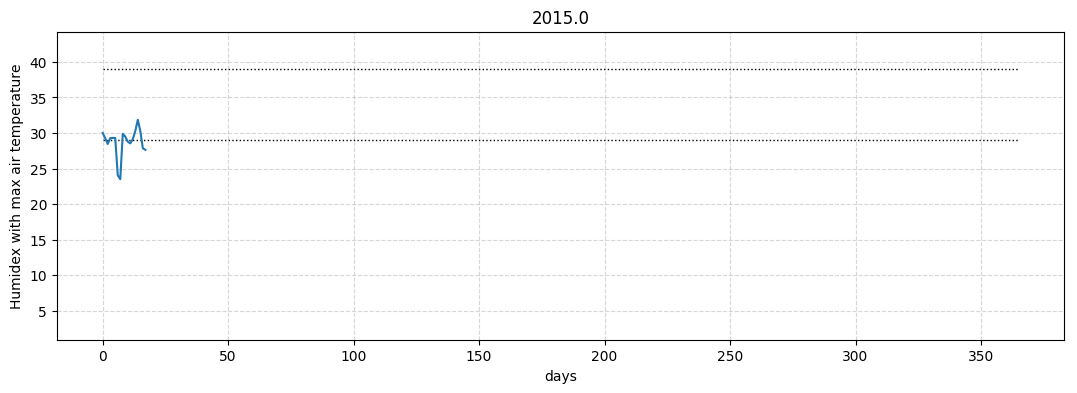

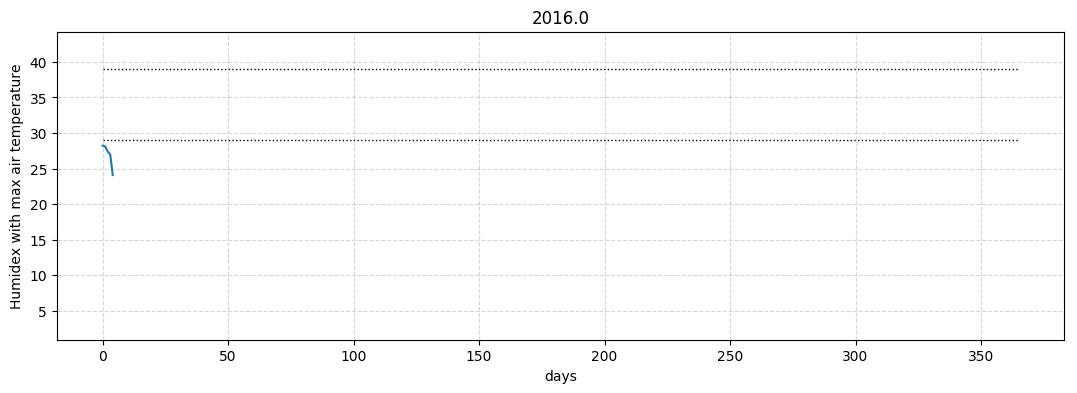

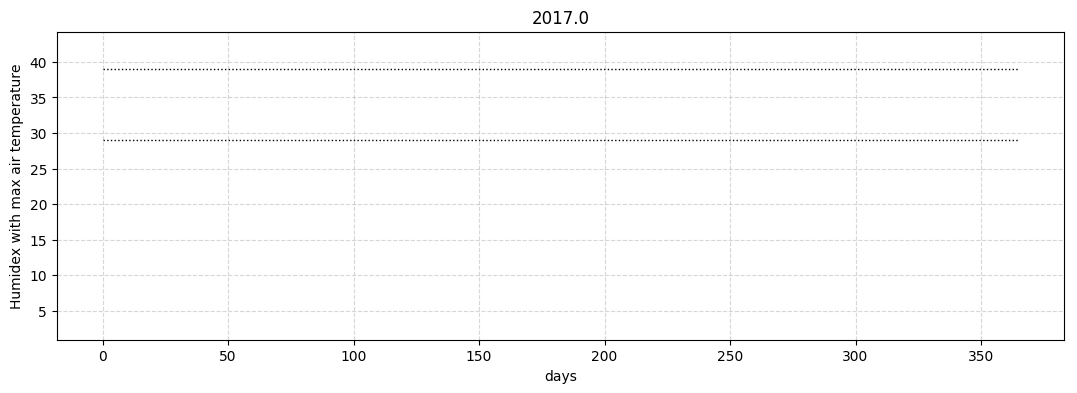

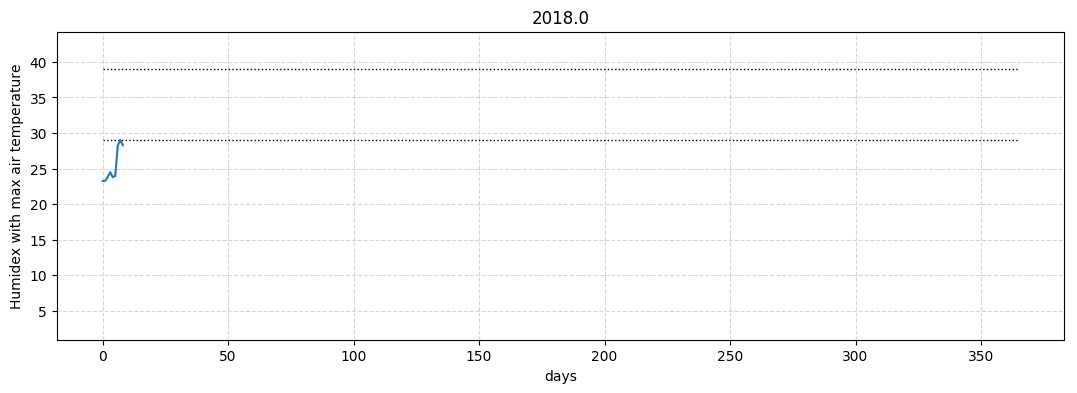

In [55]:
var1 = 'h_max2'

min_y_value = data[var1].min() - 5
max_y_value = data[var1].max() + 5


for i in data['YEAR'].unique():
    data_2plot = data[(data['YEAR'] == i)&(data['CTX90pct'] == 1)]

    plt.figure(figsize=(13,4))
    plt.title(str(i))    
    plt.plot(np.arange(data_2plot.shape[0]),data_2plot[var1])
    
    plt.hlines(y=29,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    plt.hlines(y=39,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    plt.hlines(y=45,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    plt.hlines(y=54,xmin = 0, xmax = 365, color='black', alpha=1, linewidth=1, linestyles='dotted')
    
    plt.xlabel('days')
    plt.ylabel('Humidex with max air temperature')
    plt.grid(True, linestyle='--', alpha = 0.5)
#     plt.xlim(min_x_value, max_x_value)
    plt.ylim(min_y_value, max_y_value)
    plt.show()

In [47]:
data[data['CTN90pct'] == 1]['h_mean2'].mean()

20.013470505453743

In [48]:
data[data['CTN90pct'] == 0]['h_mean2'].mean()

15.93909738027868

In [49]:
data[data['CTX90pct'] == 1]['h_mean2'].mean()

20.469273823470246

In [50]:
data[data['CTX90pct'] == 0]['h_mean2'].mean()

15.893771148835542

In [54]:
data[data['CTX90pct'] == 1]['h_max2'].max()

39.244999999999997